# **Bike Sales Analysis**

## **Import Library and Data**

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import warnings

from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
from pypalettes import load_cmap

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, message=".*palette list has more values.*")
warnings.simplefilter('ignore', category=UserWarning)

In [2]:
try:
    # Try loading the file from your laptop path
    df = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/Data-Analysis-Portfolio/bike-sales/Sales.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    df = pd.read_csv('C:/Users/Eugene/Documents/GitHub/Data-Analysis-Portfolio/bike-sales/Sales.csv')

## **Initial Exploration**

In [3]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [5]:
df.shape

(113036, 18)

In [6]:
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [7]:
df.nunique().reset_index()

,index,0
0,Date,1884
1,Day,31
2,Month,12
3,Year,6
4,Customer_Age,70
5,Age_Group,4
6,Customer_Gender,2
7,Country,6
8,State,53
9,Product_Category,3


In [8]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [9]:
df.describe(include= object)

,Date,Month,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product
count,113036,113036,113036,113036,113036,113036,113036,113036,113036
unique,1884,12,4,2,6,53,3,17,130
top,2016-03-01,June,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,Water Bottle - 30 oz.
freq,288,11234,55824,58312,39206,22450,70120,33870,10794


In [10]:
# # Group by 'Country' and 'Product' and get the unique 'Unit_Price' values
# country_product_prices = df.groupby(['Country', 'Product']).agg({
#     'Unit_Price': lambda x: sorted(x.unique())  # Sort and list unique prices
# }).reset_index()

# # Pivot the table so countries are rows and products are columns
# price_table = country_product_prices.pivot(index='Product', columns='Country', values='Unit_Price')

# # Optional: Fill NaNs with a placeholder if desired, e.g., 'No Data'
# price_table = price_table.fillna('No Data')

# # Display the table
# price_table

## **Data Preprocessing**

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df['Expected_Revenue'] = df['Unit_Price'] * df['Order_Quantity']

In [13]:
df['revenue_diff'] = df['Expected_Revenue'] - df['Revenue']

In [14]:
def extract_product_color_size(product_detail):
    # Define patterns for color and size
    color_pattern = r'(Silver|Black|Blue|Red|Yellow)'
    size_pattern = r'(\b[XSML]\b|\d{2})$'
    
    # Match color
    color_match = re.search(color_pattern, product_detail)
    product_color = color_match.group() if color_match else 'unknown'
    
    # Match size
    size_match = re.search(size_pattern, product_detail)
    product_size = size_match.group() if size_match else 'unknown'
    
    # Remove color and size from product name
    product_name = re.sub(f'{color_pattern}|{size_pattern}', '', product_detail).strip(', ').strip()

    return product_color, product_size, product_name

In [15]:
df['Product_Details'] = df['Product'].apply(extract_product_color_size)

In [16]:
# Split into separate columns for color, size, and name
df[['Product_Color', 'Product_Size', 'Product_Name']] = pd.DataFrame(df['Product_Details'].tolist(), index=df.index)

In [17]:
df.drop('Product_Details', axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [45]:
cmap = load_cmap("Antique")

In [20]:
# Function to format large numbers as K, M, etc.
def shorten_large_numbers(x, pos=None):
    if x >= 1e6:
        return f'{x * 1e-6:.2f}M'
    elif x >= 1e3:
        return f'{x * 1e-3:.2f}K'
    else:
        return f'{x:.2f}'

In [21]:
df.sample(15)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Expected_Revenue,revenue_diff,Product_Color,Product_Size,Product_Name
77144,2014-01-13,13,January,2014,36,Adults (35-64),F,Australia,New South Wales,Accessories,...,2,5,12,10,22,25,3,unknown,unknown,Mountain Tire Tube
95650,2014-02-25,25,February,2014,28,Young Adults (25-34),M,Canada,British Columbia,Accessories,...,11,30,299,176,475,480,5,unknown,unknown,ML Mountain Tire
19423,2016-06-24,24,June,2016,29,Young Adults (25-34),M,United States,Oregon,Clothing,...,7,9,7,70,77,90,13,unknown,unknown,AWC Logo Cap
13062,2015-12-21,21,December,2015,27,Young Adults (25-34),M,United States,Oregon,Accessories,...,3,9,95,60,155,180,25,unknown,unknown,Road Bottle Cage
12504,2014-02-05,5,February,2014,33,Young Adults (25-34),M,France,Hauts de Seine,Accessories,...,2,5,58,44,102,110,8,unknown,unknown,Water Bottle - 30 oz.
79998,2014-03-07,7,March,2014,54,Adults (35-64),M,Canada,British Columbia,Accessories,...,2,5,62,42,104,105,1,unknown,unknown,Mountain Tire Tube
110829,2016-01-15,15,January,2016,59,Adults (35-64),F,United States,California,Bikes,...,1482,2384,854,1482,2336,2384,48,Blue,60,Touring-1000
89734,2014-02-28,28,February,2014,45,Adults (35-64),F,Australia,New South Wales,Accessories,...,9,25,179,126,305,350,45,unknown,unknown,ML Road Tire
13779,2014-05-06,6,May,2014,35,Adults (35-64),F,United Kingdom,England,Accessories,...,2,5,48,34,82,85,3,unknown,unknown,Water Bottle - 30 oz.
107447,2013-09-14,14,September,2013,23,Youth (<25),F,Australia,Queensland,Accessories,...,2,5,62,56,118,140,22,unknown,unknown,Touring Tire Tube


## **Analysis**

### **1. Product Division**

This division focuses on understanding the performance of various products and product categories to guide inventory, marketing, and development strategies.

#### **Analysis 1: Top-selling Products by Revenue and Profit**

In [21]:
# Group by product and calculate total revenue and profit
product_performance = df.groupby('Product_Name').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

In [22]:
# Top 10 products by revenue
top_products_revenue = product_performance.sort_values(by='Revenue', ascending=False).head(10)
top_products_revenue

,Product_Name,Revenue,Profit,Order_Quantity
19,Mountain-200,17270140,6746202,8360
26,Road-150,15059278,4799132,4726
27,Road-250,8298132,2387999,3823
34,Sport-100 Helmet,5742797,3381178,181663
37,Touring-1000,5650469,1766147,2621
28,Road-350-W,3701331,1053396,2445
29,Road-550-W,3172353,910004,3173
18,Mountain-100,2086331,707209,724
31,Road-750,1788246,524046,3675
41,Women's Mountain Shorts,1743621,1036161,27210


In [23]:
# Top 10 products by profit
top_products_profit = product_performance.sort_values(by='Profit', ascending=False).head(10)
top_products_profit

,Product_Name,Revenue,Profit,Order_Quantity
19,Mountain-200,17270140,6746202,8360
26,Road-150,15059278,4799132,4726
34,Sport-100 Helmet,5742797,3381178,181663
27,Road-250,8298132,2387999,3823
37,Touring-1000,5650469,1766147,2621
28,Road-350-W,3701331,1053396,2445
41,Women's Mountain Shorts,1743621,1036161,27210
29,Road-550-W,3172353,910004,3173
4,Fender Set - Mountain,1245985,749041,62118
18,Mountain-100,2086331,707209,724


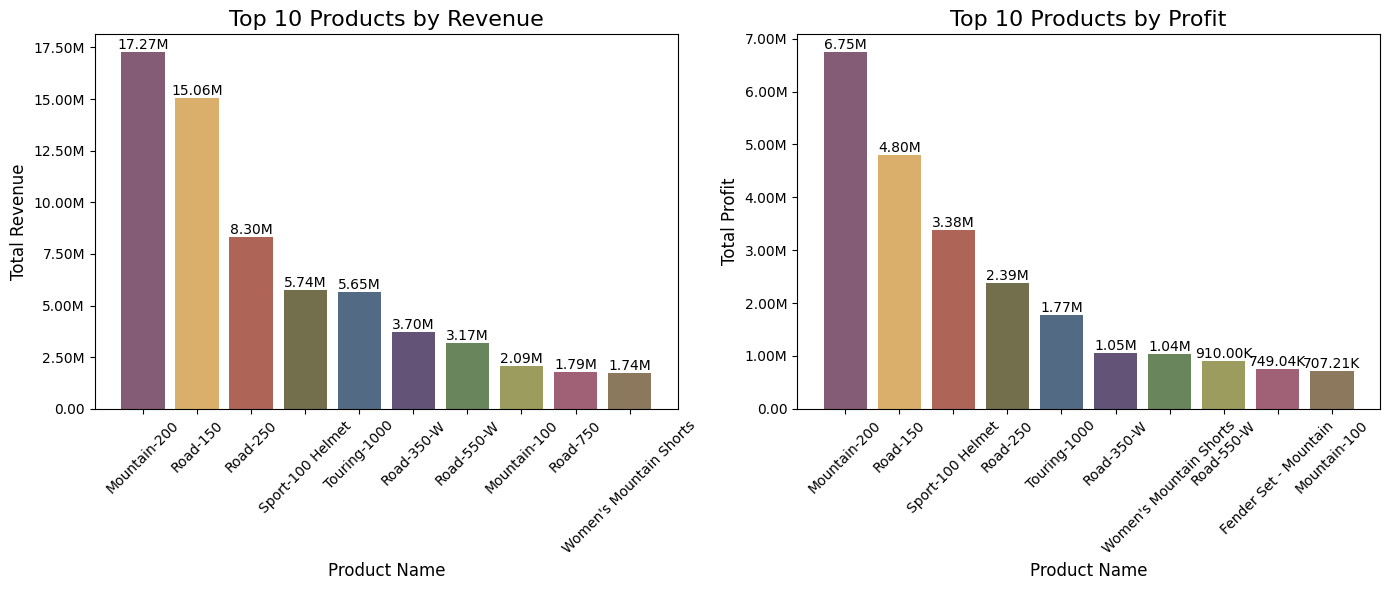

In [24]:
# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Revenue
axs[0].bar(top_products_revenue['Product_Name'], top_products_revenue['Revenue'], color=cmap.colors)
axs[0].set_title('Top 10 Products by Revenue', fontsize=16)
axs[0].set_xlabel('Product Name', fontsize=12)
axs[0].set_ylabel('Total Revenue', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)

# Add value labels for Revenue bars using the shorten_large_numbers function
for i, value in enumerate(top_products_revenue['Revenue']):
    axs[0].text(i, value, shorten_large_numbers(value), ha='center', va='bottom', fontsize=10)
    
# Set the y-axis formatter for Revenue
axs[0].yaxis.set_major_formatter(FuncFormatter(shorten_large_numbers))

# Plot for Profit
axs[1].bar(top_products_profit['Product_Name'], top_products_profit['Profit'], color=cmap.colors)
axs[1].set_title('Top 10 Products by Profit', fontsize=16)
axs[1].set_xlabel('Product Name', fontsize=12)
axs[1].set_ylabel('Total Profit', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)

# Add value labels for Profit bars using the shorten_large_numbers function
for i, value in enumerate(top_products_profit['Profit']):
    axs[1].text(i, value, shorten_large_numbers(value), ha='center', va='bottom', fontsize=10)

# Set the y-axis formatter for Profit
axs[1].yaxis.set_major_formatter(FuncFormatter(shorten_large_numbers))

# Layout adjustment
plt.tight_layout()
plt.show()


#### **Analysis 2: Product Category and Sub-category Performance**

In [25]:
# Group by product category
category_performance = df.groupby(['Product_Category']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_Quantity': 'sum'
}).reset_index().sort_values(by='Revenue', ascending=False)
category_performance

,Product_Category,Revenue,Profit,Order_Quantity
1,Bikes,61782134,20519276,36411
0,Accessories,15117992,8862377,1054162
2,Clothing,8370882,2839447,254743


In [26]:
# Group by product sub-category
sub_category_performance = df.groupby(['Sub_Category']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_Quantity': 'sum'
}).reset_index().sort_values(by='Revenue', ascending=False)
sub_category_performance

,Sub_Category,Revenue,Profit,Order_Quantity
11,Road Bikes,33363061,10078875,19771
10,Mountain Bikes,21123526,8160463,11992
15,Touring Bikes,7295547,2279938,4648
7,Helmets,5741081,3380203,181606
14,Tires and Tubes,4670902,2727713,514051
9,Jerseys,4113742,603568,88125
12,Shorts,1740710,1034342,27168
2,Bottles and Cages,1409174,810598,241726
5,Fenders,1245733,748914,62138
8,Hydration Packs,990406,572668,19914


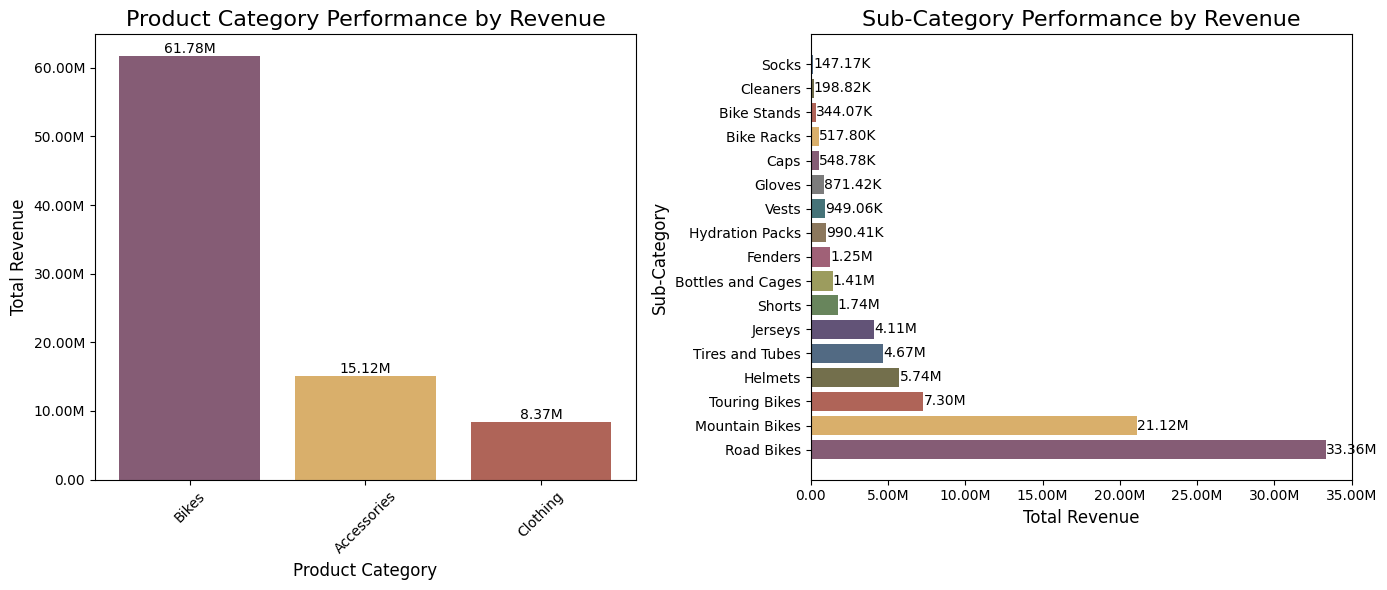

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].bar(category_performance['Product_Category'], category_performance['Revenue'], color=cmap.colors)
axs[0].set_title('Product Category Performance by Revenue', fontsize=16)
axs[0].set_xlabel('Product Category', fontsize=12)
axs[0].set_ylabel('Total Revenue', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)
for i, value in enumerate(category_performance['Revenue']):
    axs[0].text(i, value, shorten_large_numbers(value), ha='center', va='bottom', fontsize=10)
axs[0].yaxis.set_major_formatter(FuncFormatter(shorten_large_numbers))

axs[1].barh(sub_category_performance['Sub_Category'], sub_category_performance['Revenue'], color=cmap.colors)
axs[1].set_title('Sub-Category Performance by Revenue', fontsize=16)
axs[1].set_xlabel('Total Revenue', fontsize=12)
axs[1].set_ylabel('Sub-Category', fontsize=12)
for i, value in enumerate(sub_category_performance['Revenue']):
    axs[1].text(value, i, shorten_large_numbers(value), va='center', fontsize=10) 
axs[1].xaxis.set_major_formatter(FuncFormatter(shorten_large_numbers))

plt.tight_layout()
plt.show()

#### **Analysis 3: All Time Performance**

In [28]:
# Group by 'Date', 'Product_Category', and 'Sub_Category', and aggregate 'Revenue', 'Profit', and 'Order_Quantity'
product_category_data = df.groupby(['Date', 'Product_Category']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

product_category_data

,Date,Product_Category,Revenue,Profit,Order_Quantity
0,2011-01-01,Bikes,12821,3225,8
1,2011-01-02,Bikes,11868,2925,9
2,2011-01-03,Bikes,31175,12174,17
3,2011-01-04,Bikes,18909,6240,10
4,2011-01-05,Bikes,4675,1644,5
...,...,...,...,...,...
3401,2016-07-29,Clothing,8295,3169,204
3402,2016-07-30,Accessories,8591,4995,664
3403,2016-07-30,Clothing,6170,1982,179
3404,2016-07-31,Accessories,15576,9105,953


In [29]:
# Extract 'Year' and 'Month' from the 'Date' column
product_category_data['Year'] = pd.DatetimeIndex(product_category_data['Date']).year
product_category_data['Month'] = pd.DatetimeIndex(product_category_data['Date']).month_name()

In [30]:
# Group by 'Year' and 'Month' and aggregate 'Revenue', 'Profit', and 'Order_Quantity'
monthly_metrics = product_category_data.groupby(['Year', 'Month']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

# Ensure 'Month' is categorical and ordered
monthly_metrics['Month'] = pd.Categorical(
    monthly_metrics['Month'], 
    categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Sort values by 'Year' and 'Month'
monthly_metrics = monthly_metrics.sort_values(['Year', 'Month'])
monthly_metrics

,Year,Month,Revenue,Profit,Order_Quantity
4,2011,January,675193,212849,362
3,2011,February,637598,207144,347
7,2011,March,708517,226404,397
0,2011,April,698782,223601,403
8,2011,May,734537,234689,418
...,...,...,...,...,...
60,2016,March,2608663,1036532,54191
55,2016,April,2756864,1097293,57789
61,2016,May,3264343,1287165,61370
59,2016,June,3586300,1388652,62704


In [33]:
# Pivot data for each metric to prepare for line plotting
monthly_revenue_pivot = monthly_metrics.pivot(index='Month', columns='Year', values='Revenue')
monthly_profit_pivot = monthly_metrics.pivot(index='Month', columns='Year', values='Profit')
monthly_order_quantity_pivot = monthly_metrics.pivot(index='Month', columns='Year', values='Order_Quantity')

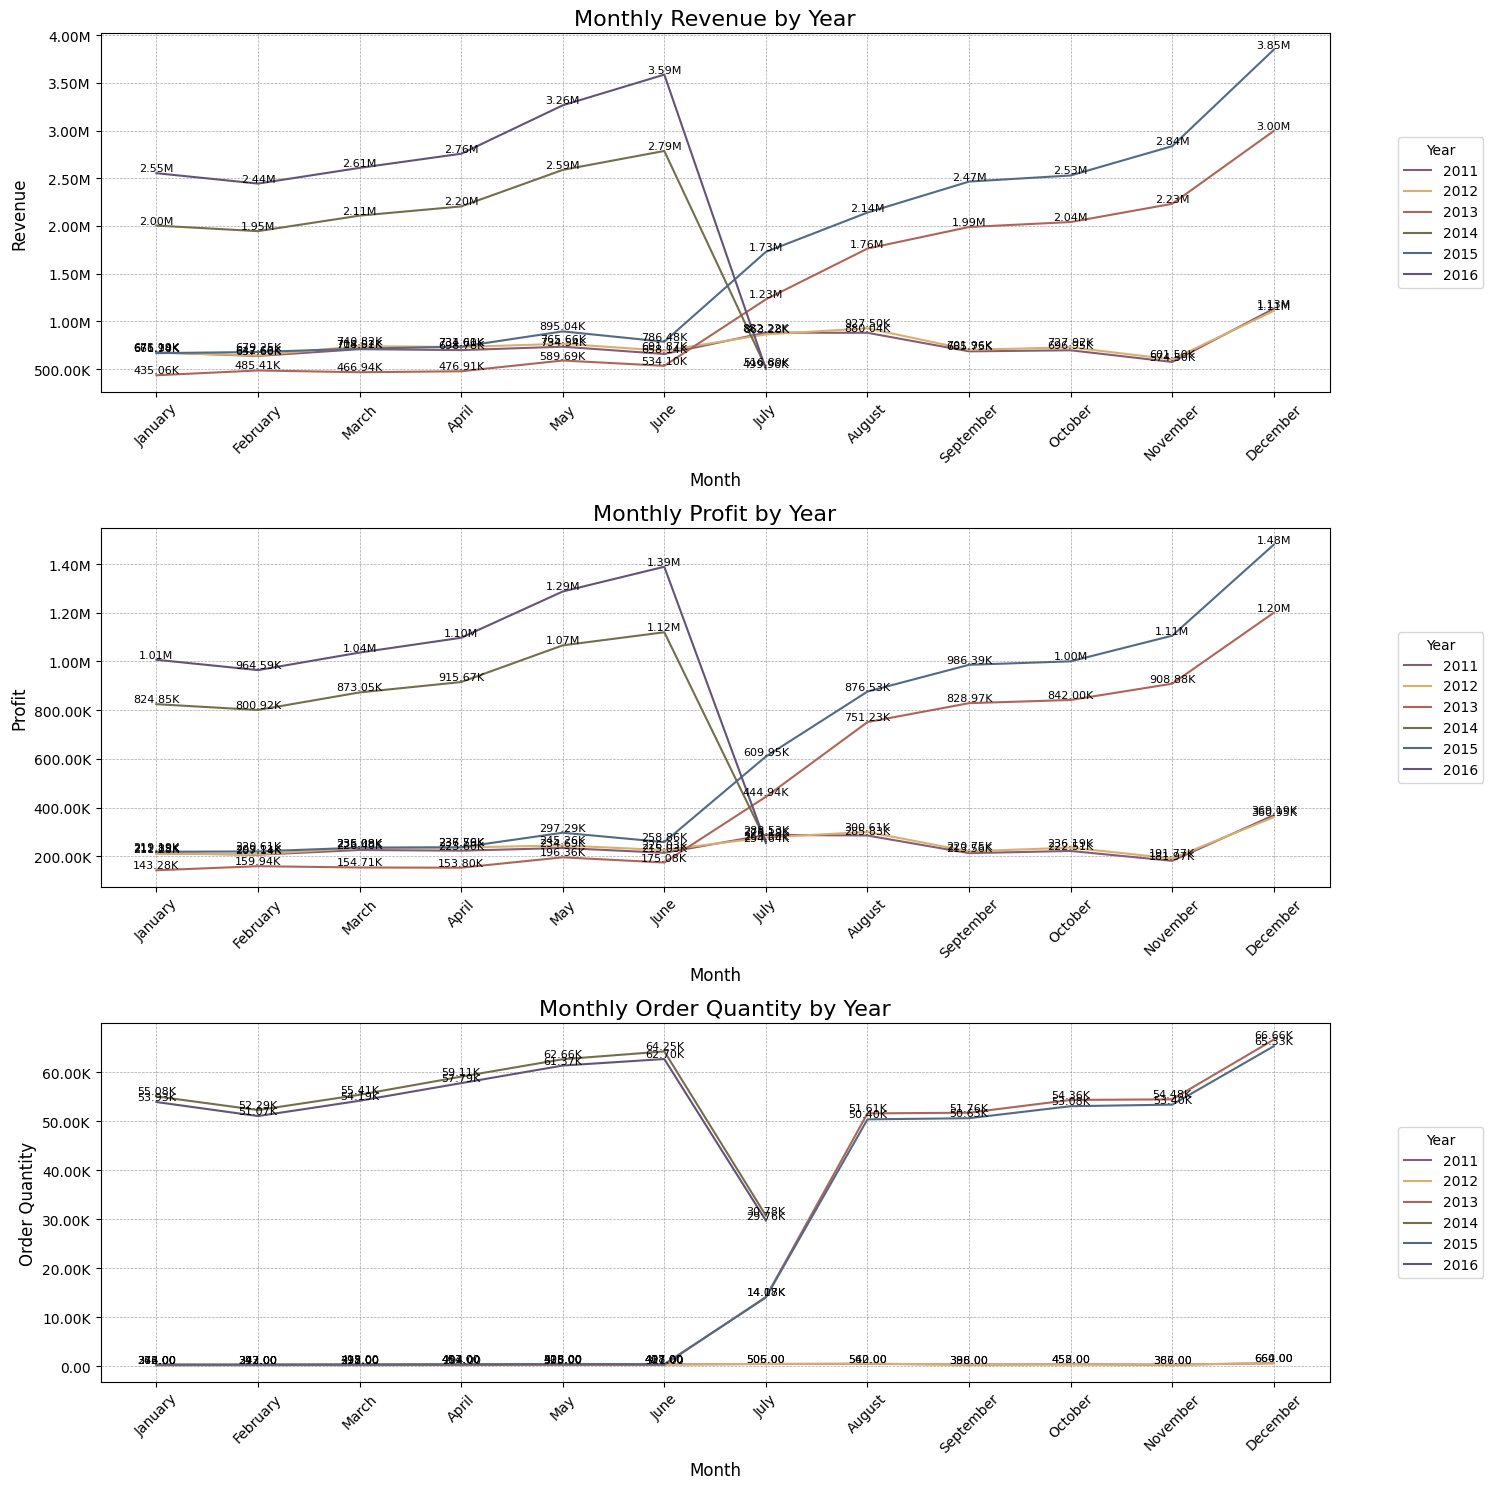

In [35]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

# Plot Revenue
for i, year in enumerate(monthly_revenue_pivot.columns):
    axs[0].plot(
        monthly_revenue_pivot.index, 
        monthly_revenue_pivot[year], 
        label=f"{year}", 
        color=cmap.colors[i % len(cmap.colors)]
    )
    # Add value labels, only if the value is finite
    for x, y in zip(monthly_revenue_pivot.index, monthly_revenue_pivot[year]):
        if np.isfinite(y):  # Check if y is finite
            axs[0].text(x, y, shorten_large_numbers(y), ha='center', va='bottom', fontsize=8)
axs[0].set_title('Monthly Revenue by Year', fontsize=16)
axs[0].set_xlabel('Month', fontsize=12)
axs[0].set_ylabel('Revenue', fontsize=12)
axs[0].legend(title='Year', loc='center left', fontsize=10, bbox_to_anchor=(1.05, 0.5), ncol=1)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
axs[0].tick_params(axis='x', rotation=45)

# Set the y-axis formatter for Revenue plot
axs[0].yaxis.set_major_formatter(FuncFormatter(shorten_large_numbers))

# Plot Profit
for i, year in enumerate(monthly_profit_pivot.columns):
    axs[1].plot(
        monthly_profit_pivot.index, 
        monthly_profit_pivot[year], 
        label=f"{year}", 
        color=cmap.colors[i % len(cmap.colors)]
    )
    # Add value labels, only if the value is finite
    for x, y in zip(monthly_profit_pivot.index, monthly_profit_pivot[year]):
        if np.isfinite(y):  # Check if y is finite
            axs[1].text(x, y, shorten_large_numbers(y), ha='center', va='bottom', fontsize=8)
            # axs[1].text(x, y, f"${shorten_large_numbers(y):,.0f}", ha='center', va='bottom', fontsize=8)
axs[1].set_title('Monthly Profit by Year', fontsize=16)
axs[1].set_xlabel('Month', fontsize=12)
axs[1].set_ylabel('Profit', fontsize=12)
axs[1].legend(title='Year', loc='center left', fontsize=10, bbox_to_anchor=(1.05, 0.5), ncol=1)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
axs[1].tick_params(axis='x', rotation=45)

# Set the y-axis formatter for Profit plot
axs[1].yaxis.set_major_formatter(FuncFormatter(shorten_large_numbers))

# Plot Order Quantity
for i, year in enumerate(monthly_order_quantity_pivot.columns):
    axs[2].plot(
        monthly_order_quantity_pivot.index, 
        monthly_order_quantity_pivot[year], 
        label=f"{year}", 
        color=cmap.colors[i % len(cmap.colors)]
    )
    # Add value labels, only if the value is finite
    for x, y in zip(monthly_order_quantity_pivot.index, monthly_order_quantity_pivot[year]):
        if np.isfinite(y):  # Check if y is finite
            # axs[2].text(x, y, f"{y:,.0f}", ha='center', va='bottom', fontsize=8)
            axs[2].text(x, y, shorten_large_numbers(y), ha='center', va='bottom', fontsize=8)
axs[2].set_title('Monthly Order Quantity by Year', fontsize=16)
axs[2].set_xlabel('Month', fontsize=12)
axs[2].set_ylabel('Order Quantity', fontsize=12)
axs[2].legend(title='Year', loc='center left', fontsize=10, bbox_to_anchor=(1.05, 0.5), ncol=1)
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
axs[2].tick_params(axis='x', rotation=45)

# Set the y-axis formatter for Order Quantity plot
axs[2].yaxis.set_major_formatter(FuncFormatter(shorten_large_numbers))

# Adjust layout
plt.tight_layout()
plt.show()


In [36]:
# Group by Year, Product_Category, and Sub_Category and aggregate the metrics
annual_performance = df.groupby(['Year', 'Product_Category', 'Sub_Category']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

# Check the resulting DataFrame
annual_performance.head()


,Year,Product_Category,Sub_Category,Revenue,Profit,Order_Quantity
0,2011,Bikes,Mountain Bikes,2198270,834516,1245
1,2011,Bikes,Road Bikes,6766618,2046785,4015
2,2012,Bikes,Mountain Bikes,2182853,831891,1230
3,2012,Bikes,Road Bikes,6993130,2120102,4124
4,2013,Accessories,Bike Racks,112605,65625,1044


In [37]:
# Get unique Product Categories
unique_categories = annual_performance['Product_Category'].unique()

In [39]:
# Function to format large numbers as K, M, etc.
def shorten_large_numbers(x, pos=None):
    if x >= 1e6:
        return f'{x * 1e-6:.2f}M'
    elif x >= 1e3:
        return f'{x * 1e-3:.2f}K'
    else:
        return f'{x:.2f}'

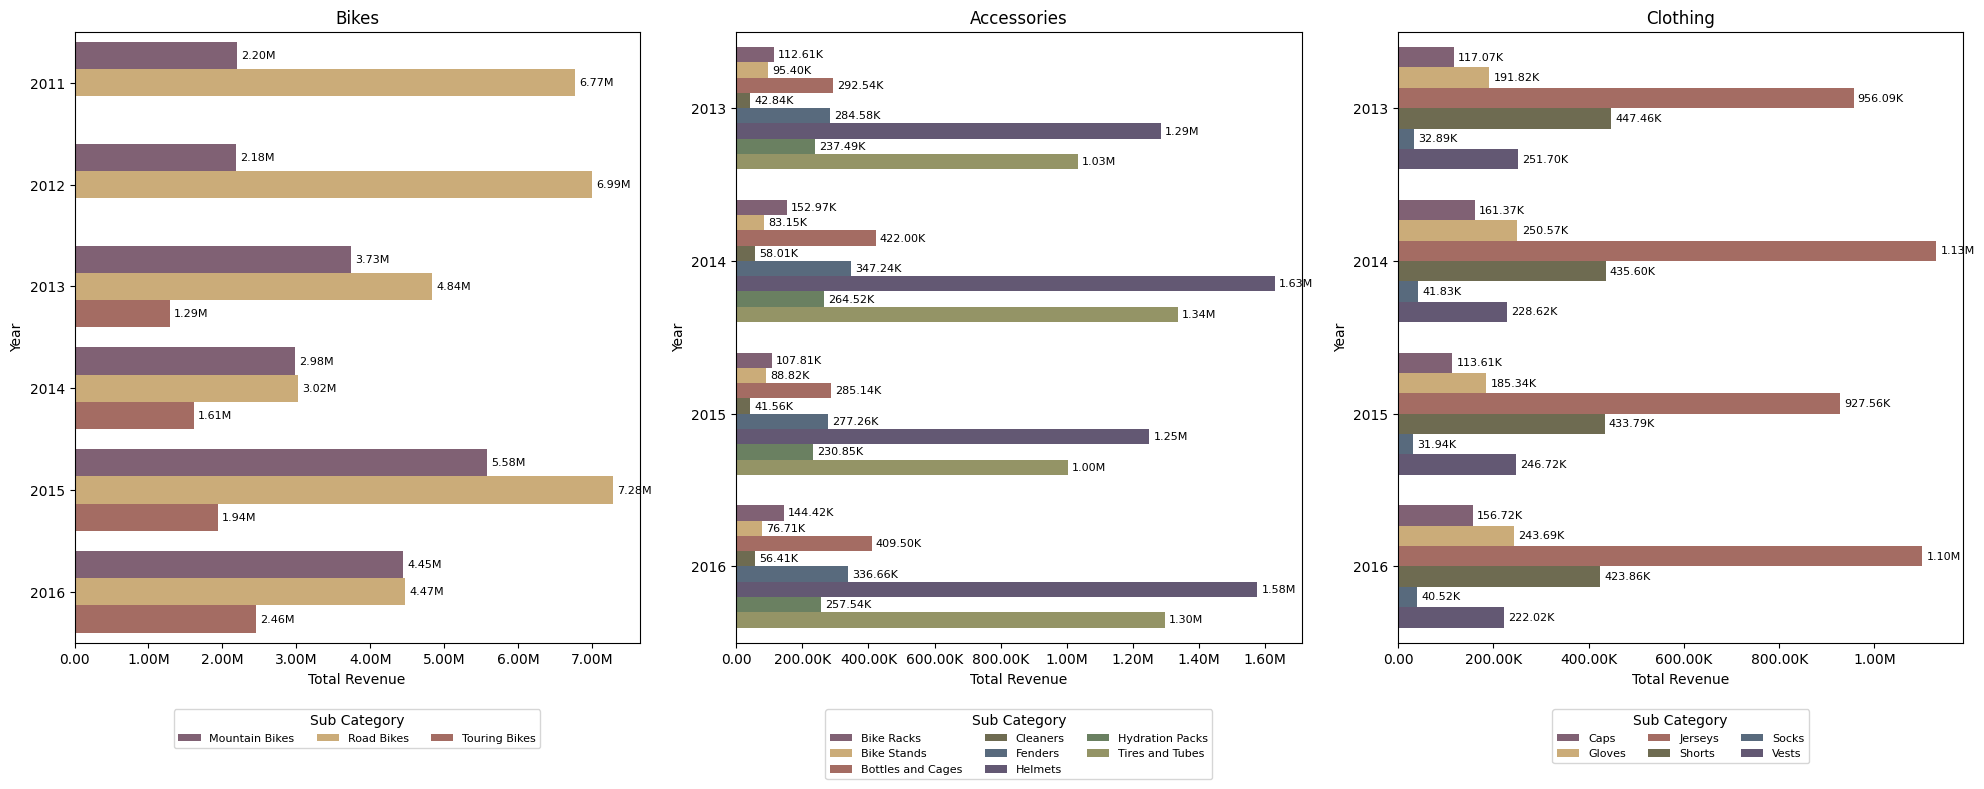

In [42]:
# Create a figure with subplots for each unique Product Category
fig, axes = plt.subplots(nrows=1, ncols=len(unique_categories), figsize=(20, 8), sharey=False)

# Loop through each unique Product Category and plot in respective subplot
for ax, category in zip(axes, unique_categories):
    # Filter data for the current Product Category
    category_data = annual_performance[annual_performance['Product_Category'] == category]
    
    # Create a bar plot for the current category
    barplot = sns.barplot(data=category_data, y='Year', x='Revenue', hue='Sub_Category', ax=ax, palette=cmap.colors, orient='h')
    
    # Set title and labels for each subplot
    ax.set_title(category)
    ax.set_xlabel('Total Revenue')
    ax.set_ylabel('Year')
    ax.legend(title='Sub Category', loc='upper center', fontsize=8, bbox_to_anchor=(0.5, -0.1), ncol=3)
    
    # Apply the formatter to the y-axis
    ax.xaxis.set_major_formatter(FuncFormatter(shorten_large_numbers))
    
    # Add annotations to each bar with formatted labels
    for container in barplot.containers:
        # Use a lambda function to apply shorten_large_numbers without needing pos argument
        labels = [shorten_large_numbers(v) for v in container.datavalues]
        barplot.bar_label(container, labels=labels, label_type='edge', padding=3, fontsize=8, color='black', rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

#### **Analysis 4: Low-performing Products**

In [73]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Product_Color,Product_Size,Product_Name
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,unknown,unknown,Hitch Rack - 4-Bike
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,unknown,unknown,Hitch Rack - 4-Bike
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,unknown,unknown,Hitch Rack - 4-Bike
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,unknown,unknown,Hitch Rack - 4-Bike
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,unknown,unknown,Hitch Rack - 4-Bike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,...,"Classic Vest, S",3,24,64,112,72,184,unknown,S,Classic Vest
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,...,"Classic Vest, M",22,24,64,655,528,1183,unknown,M,Classic Vest
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,...,"Classic Vest, M",22,24,64,655,528,1183,unknown,M,Classic Vest
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,...,"Classic Vest, L",24,24,64,684,576,1260,unknown,L,Classic Vest


In [45]:
# Products with lowest revenue (Bottom 10)
low_products_revenue = product_performance.sort_values(by='Revenue').head(10)
low_products_revenue

,Product_Name,Revenue,Profit,Order_Quantity,Profit_Margin
23,Racing Socks,144260,91352,17636,0.633246
2,Bike Wash - Dissolver,198745,116008,27579,0.583703
25,Road Tire Tube,226478,164182,62296,0.724936
36,Touring Tire Tube,257528,143924,56802,0.558867
35,Touring Tire,263741,151310,10221,0.573707
22,Patch Kit/8 Patches,283863,126280,157583,0.444862
10,LL Mountain Tire,284671,169975,12744,0.597093
24,Road Bottle Cage,324246,203754,40164,0.628393
16,Mountain Bottle Cage,338929,189009,37480,0.557665
1,All-Purpose Bike Stand,342664,201064,2400,0.586767


In [44]:
# Products with lowest profit margins
product_performance['Profit_Margin'] = product_performance['Profit'] / product_performance['Revenue']
low_profit_margin = product_performance.sort_values(by='Profit_Margin').head(10)

low_profit_margin

,Product_Name,Revenue,Profit,Order_Quantity,Profit_Margin
32,Short-Sleeve Classic Jersey,1489715,183011,31112,0.122850
33,"Short-Sleeve Classic Jersey, XL",447126,58878,9244,0.131681
0,AWC Logo Cap,549220,78008,67316,0.142034
13,"Long-Sleeve Logo Jersey, XL",515629,76767,11549,0.148880
12,Long-Sleeve Logo Jersey,1661272,284912,36220,0.171502
28,Road-350-W,3701331,1053396,2445,0.284599
29,Road-550-W,3172353,910004,3173,0.286855
27,Road-250,8298132,2387999,3823,0.287775
31,Road-750,1788246,524046,3675,0.293050
30,Road-650,1343721,404298,1929,0.300879


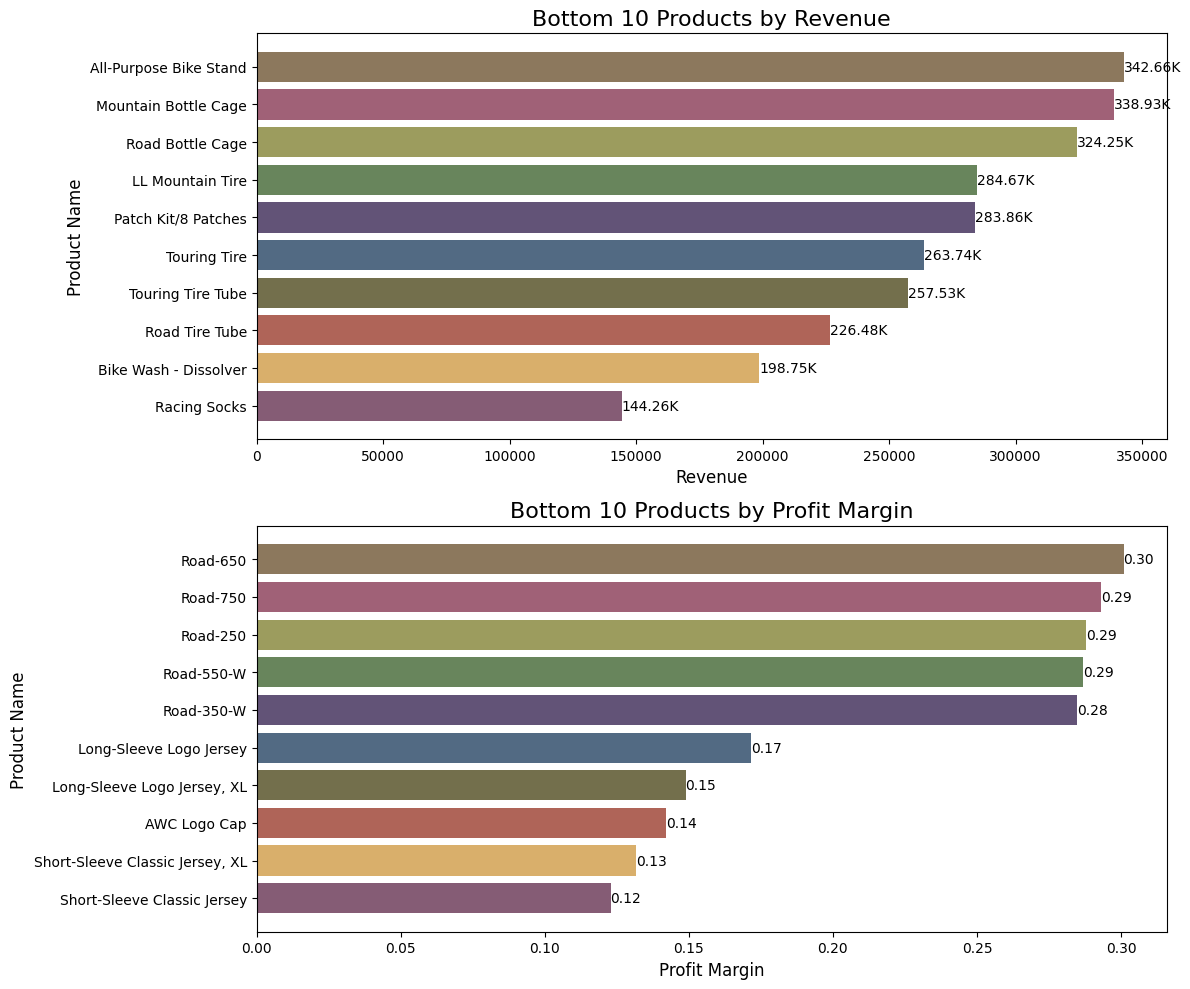

In [51]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot for lowest revenue products
axs[0].barh(low_products_revenue['Product_Name'], low_products_revenue['Revenue'], color=cmap.colors)
axs[0].set_title('Bottom 10 Products by Revenue', fontsize=16)
axs[0].set_xlabel('Revenue', fontsize=12)
axs[0].set_ylabel('Product Name', fontsize=12)
axs[0].tick_params(axis='y', rotation=0)  # Rotate x-ticks if needed
for i, value in enumerate(low_products_revenue['Revenue']):
    axs[0].text(value, i, shorten_large_numbers(value), va='center', fontsize=10)

# Plot for lowest profit margins
axs[1].barh(low_profit_margin['Product_Name'], low_profit_margin['Profit_Margin'], color=cmap.colors)
axs[1].set_title('Bottom 10 Products by Profit Margin', fontsize=16)
axs[1].set_xlabel('Profit Margin', fontsize=12)
axs[1].set_ylabel('Product Name', fontsize=12)
axs[1].tick_params(axis='y', rotation=0)  # Rotate x-ticks if needed
for i, value in enumerate(low_profit_margin['Profit_Margin']):
    axs[1].text(value, i, f'{value:.2f}', va='center', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

#### **Predictive Analytics: Forecast Product Demand (XGBoost)**

In [53]:
df.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Expected_Revenue,revenue_diff,Product_Color,Product_Size,Product_Name
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,...,24,64,112,72,184,192,8,unknown,S,Classic Vest
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,...,24,64,655,528,1183,1408,225,unknown,M,Classic Vest
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,...,24,64,655,528,1183,1408,225,unknown,M,Classic Vest
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,...,24,64,684,576,1260,1536,276,unknown,L,Classic Vest
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,...,24,64,655,552,1207,1472,265,unknown,L,Classic Vest


In [54]:
ts_df = df.copy()

In [55]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [59]:
ts_revenue = df.groupby('Date').agg({'Revenue': 'sum'}).reset_index()
ts_revenue

,Date,Revenue
0,2011-01-01,12821
1,2011-01-02,11868
2,2011-01-03,31175
3,2011-01-04,18909
4,2011-01-05,4675
...,...,...
1879,2016-07-27,14094
1880,2016-07-28,19102
1881,2016-07-29,19329
1882,2016-07-30,14761


In [60]:
ts_revenue.set_index('Date', inplace=True)
ts_revenue = ts_revenue.resample('D').sum().reset_index()

In [63]:
ts_revenue.set_index('Date', inplace=True)
ts_revenue

,Revenue
Date,
2011-01-01,12821
2011-01-02,11868
2011-01-03,31175
2011-01-04,18909
2011-01-05,4675
...,...
2016-07-27,14094
2016-07-28,19102
2016-07-29,19329


In [64]:
lags = 7
for lag in range(1, lags + 1):
    ts_revenue[f'lag_{lag}'] = ts_revenue['Revenue'].shift(lag)

ts_revenue = ts_revenue.dropna()
ts_revenue

,Revenue,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2011-01-08,33610,6248.0,18253.0,4675.0,18909.0,31175.0,11868.0,12821.0
2011-01-09,24035,33610.0,6248.0,18253.0,4675.0,18909.0,31175.0,11868.0
2011-01-10,19303,24035.0,33610.0,6248.0,18253.0,4675.0,18909.0,31175.0
2011-01-11,28786,19303.0,24035.0,33610.0,6248.0,18253.0,4675.0,18909.0
2011-01-12,23988,28786.0,19303.0,24035.0,33610.0,6248.0,18253.0,4675.0
...,...,...,...,...,...,...,...,...
2016-07-27,14094,13025.0,11407.0,14341.0,13824.0,23804.0,11453.0,20786.0
2016-07-28,19102,14094.0,13025.0,11407.0,14341.0,13824.0,23804.0,11453.0
2016-07-29,19329,19102.0,14094.0,13025.0,11407.0,14341.0,13824.0,23804.0


In [83]:
ts_revenue['day_of_week'] = ts_revenue.index.dayofweek
ts_revenue['month'] = ts_revenue.index.month

C:\Users\Eugene\AppData\Local\Temp\ipykernel_24484\2990390734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_revenue['day_of_week'] = ts_revenue.index.dayofweek
C:\Users\Eugene\AppData\Local\Temp\ipykernel_24484\2990390734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_revenue['month'] = ts_revenue.index.month


In [69]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [67]:
x = ts_revenue.drop('Revenue', axis=1)
y = ts_revenue['Revenue']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [ ]:
ts_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05)

In [71]:
ts_model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
y_pred = ts_model.predict(x_test)

In [73]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 27481.955285903652


In [74]:
# Predicting future values
n_forecast = 30  # For example, 180 days (6 months)

# Prepare the last available row of the training data to start the prediction
last_known_data = ts_revenue.iloc[-1][x_train.columns]

# Forecast for the next n days
forecast = []
for _ in range(n_forecast):
    prediction = ts_model.predict([last_known_data])[0]
    forecast.append(prediction)
    
    # Update the last_known_data with the new prediction
    last_known_data = last_known_data.shift(1)
    last_known_data['lag_1'] = prediction  # Update the lag feature

# Display the forecast
forecast_dates = pd.date_range(start=ts_revenue.index[-1] + pd.Timedelta(days=1), periods=n_forecast)
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Predicted_Revenue': forecast})
forecast_df


,Date,Predicted_Revenue
0,2016-08-01,16319.541016
1,2016-08-02,18446.933594
2,2016-08-03,23777.824219
3,2016-08-04,23077.365234
4,2016-08-05,22982.412109
5,2016-08-06,22925.986328
6,2016-08-07,24627.037109
7,2016-08-08,24581.564453
8,2016-08-09,25904.455078
9,2016-08-10,28466.822266


In [80]:
actual_last_30 = ts_revenue['Revenue'].tail(30)

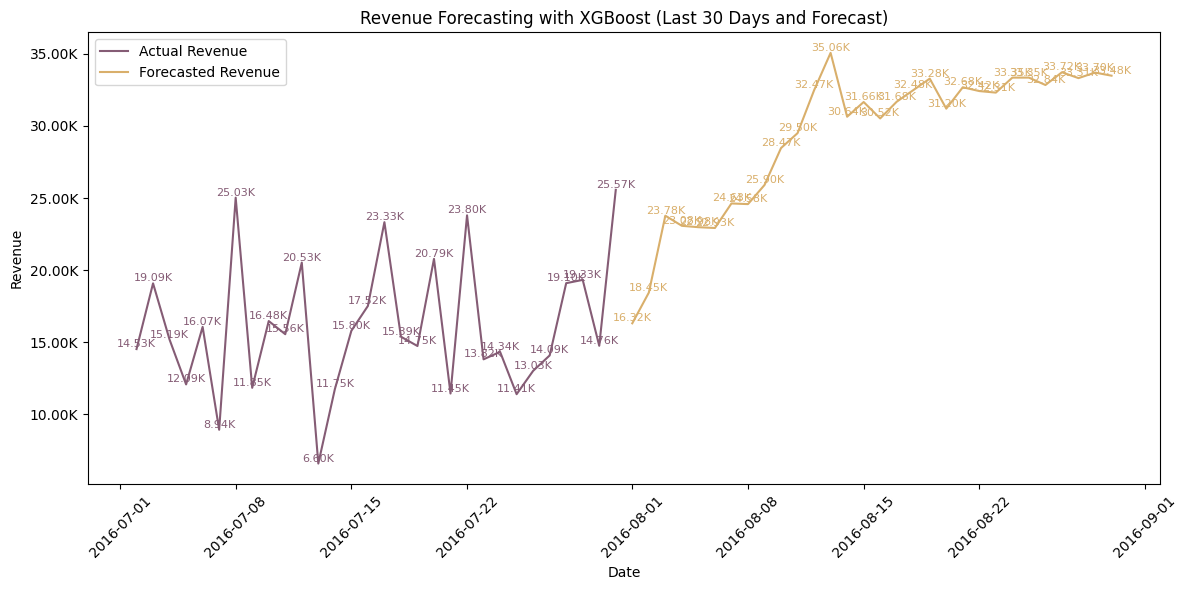

In [81]:
# Plot the actual vs predicted (forecasted)
plt.figure(figsize=(12, 6))

# Plot the actual values using the 'Antique' palette
plt.plot(actual_last_30.index, actual_last_30, label='Actual Revenue', color=cmap.colors[0])

# Plot the forecasted values with a different color from the palette
plt.plot(forecast_df['Predicted_Revenue'].index, forecast_df['Predicted_Revenue'], label='Forecasted Revenue', color=cmap.colors[1])

# Add value labels using the shorten_large_numbers function
for x, y in zip(actual_last_30.index, actual_last_30):
    if np.isfinite(y):  # Only add labels if the value is finite
        plt.text(x, y, shorten_large_numbers(y), ha='center', va='bottom', fontsize=8, color=cmap.colors[0])

for x, y in zip(forecast_df['Predicted_Revenue'].index, forecast_df['Predicted_Revenue']):
    if np.isfinite(y):  # Only add labels if the value is finite
        plt.text(x, y, shorten_large_numbers(y), ha='center', va='bottom', fontsize=8, color=cmap.colors[1])

# Apply the custom number formatting on the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(shorten_large_numbers))

# Add labels and title
plt.legend()
plt.title('Revenue Forecasting with XGBoost (Last 30 Days and Forecast)')
plt.xlabel('Date')
plt.ylabel('Revenue')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### **2. Customer Division**

This division focuses on customer analysis, including demographics, purchase behavior, and customer lifetime value.

#### **Analysis 1: Customer Age Group and Revenue**

In [86]:
# Revenue and order quantity by age group
age_group_revenue = df.groupby('Age_Group').agg({
    'Revenue': 'sum',
    'Order_Quantity': 'sum'
}).reset_index().sort_values(by='Revenue', ascending=False)

age_group_revenue

,Age_Group,Revenue,Order_Quantity
0,Adults (35-64),42584153,672417
2,Young Adults (25-34),30655614,446875
3,Youth (<25),11723199,216147
1,Seniors (64+),308042,9877


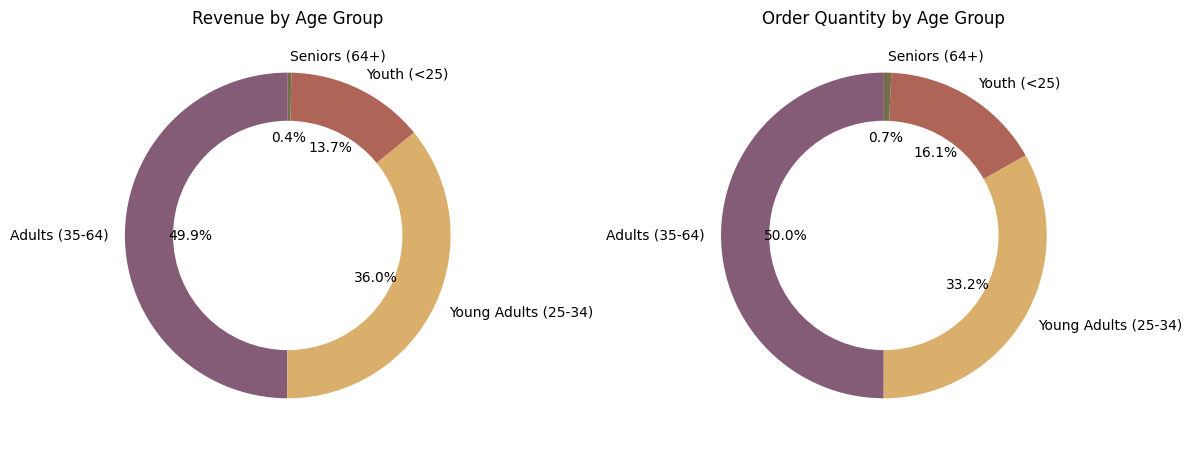

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

colors = cmap.colors

ax[0].pie(age_group_revenue['Revenue'], labels=age_group_revenue['Age_Group'], autopct='%1.1f%%', startangle=90, colors=colors[:len(age_group_revenue)])
# Draw a white circle in the middle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, color='white')
ax[0].add_artist(centre_circle)
ax[0].set_title('Revenue by Age Group')

ax[1].pie(age_group_revenue['Order_Quantity'], labels=age_group_revenue['Age_Group'], autopct='%1.1f%%', startangle=90, colors=colors[:len(age_group_revenue)])
# Draw a white circle in the middle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, color='white')
ax[1].add_artist(centre_circle)
ax[1].set_title('Order Quantity by Age Group')

plt.tight_layout()
plt.show()

#### **Analysis 2: Gender-based Buying Behavior**

In [89]:
# Revenue and quantity breakdown by gender
gender_sales = df.groupby('Customer_Gender').agg({
    'Revenue': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

gender_sales

,Customer_Gender,Revenue,Order_Quantity
0,F,41935599,645733
1,M,43335409,699583


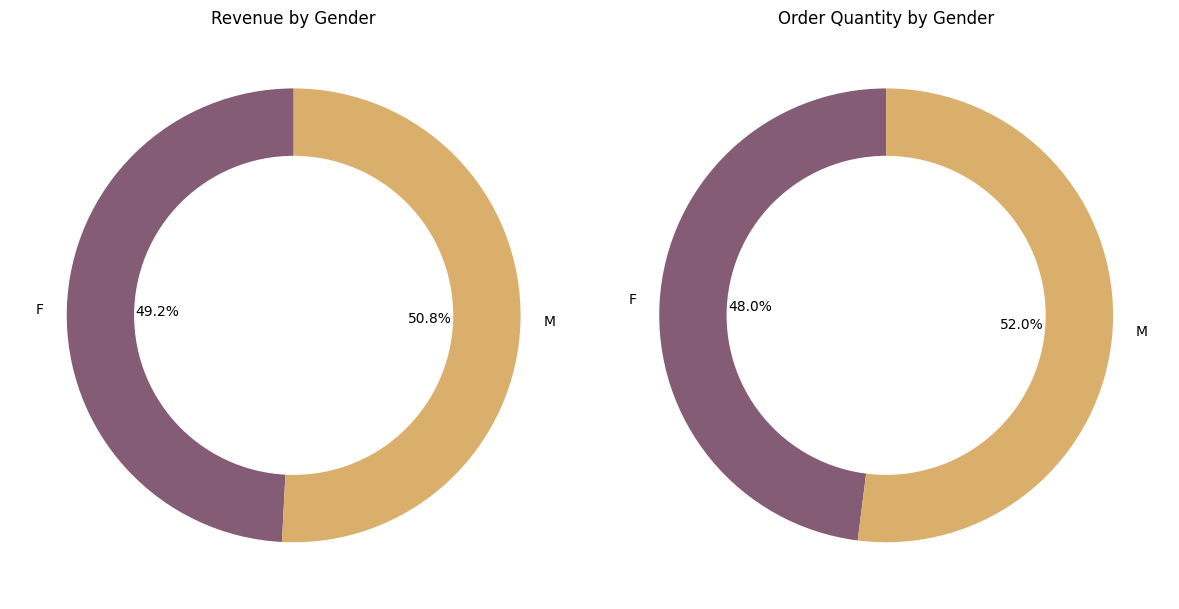

In [90]:
# Load colors from Antique palette
colors = cmap.colors

# Create the figure with two donut charts side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Revenue Donut Chart
ax[0].pie(
    gender_sales['Revenue'], 
    labels=gender_sales['Customer_Gender'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors[:len(gender_sales)]
)
centre_circle = plt.Circle((0, 0), 0.70, color='white')
ax[0].add_artist(centre_circle)
ax[0].set_title('Revenue by Gender')

# Order Quantity Donut Chart
ax[1].pie(
    gender_sales['Order_Quantity'], 
    labels=gender_sales['Customer_Gender'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors[:len(gender_sales)]
)
centre_circle = plt.Circle((0, 0), 0.70, color='white')
ax[1].add_artist(centre_circle)
ax[1].set_title('Order Quantity by Gender')

# Layout adjustments
plt.tight_layout()
plt.show()

#### **Analysis 3: Customer Country Lifetime Value (CLV)**

In [92]:
# Group by customer to calculate total revenue per customer
clv = df.groupby('Country').agg({
    'Revenue': 'sum',
    'Order_Quantity': 'sum'
}).reset_index().sort_values(by='Revenue', ascending=False)

clv

,Country,Revenue,Order_Quantity
5,United States,27975547,477539
0,Australia,21302059,263585
4,United Kingdom,10646196,157218
3,Germany,8978596,125720
2,France,8432872,128995
1,Canada,7935738,192259


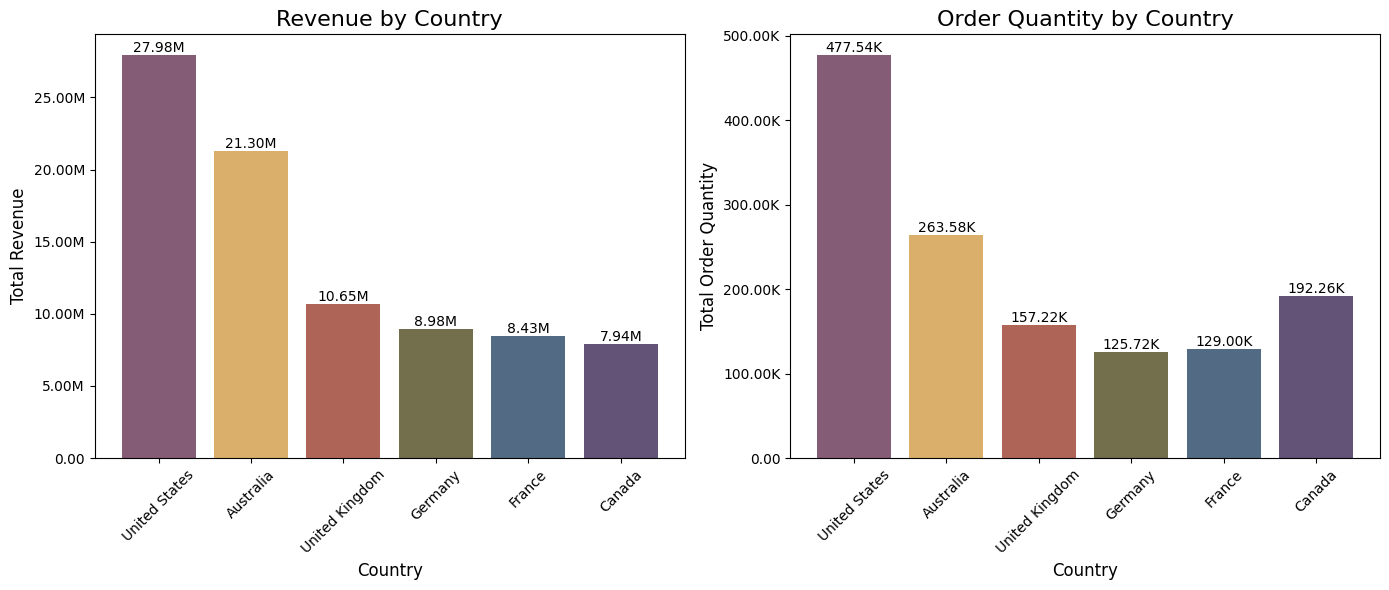

In [95]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for Revenue
axs[0].bar(clv['Country'], clv['Revenue'], color=cmap.colors[:len(clv)])
axs[0].set_title('Revenue by Country', fontsize=16)
axs[0].set_xlabel('Country', fontsize=12)
axs[0].set_ylabel('Total Revenue', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)
for i, value in enumerate(clv['Revenue']):
    axs[0].text(i, value, shorten_large_numbers(value), ha='center', va='bottom', fontsize=10)
axs[0].yaxis.set_major_formatter(FuncFormatter(shorten_large_numbers))

# Bar chart for Order Quantity
axs[1].bar(clv['Country'], clv['Order_Quantity'], color=cmap.colors[:len(clv)])
axs[1].set_title('Order Quantity by Country', fontsize=16)
axs[1].set_xlabel('Country', fontsize=12)
axs[1].set_ylabel('Total Order Quantity', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)
for i, value in enumerate(clv['Order_Quantity']):
    axs[1].text(i, value, shorten_large_numbers(value), ha='center', va='bottom', fontsize=10)
axs[1].yaxis.set_major_formatter(FuncFormatter(shorten_large_numbers))

# Adjust layout
plt.tight_layout()
plt.show()

#### **Predictive Analytics: Forecast Customer Demand (XGBoost)**

In [ ]:
# Using XGBoost to forecast customer demand
X = df[['Age_Group', 'Customer_Gender', 'Order_Quantity']]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


### **3. Sales and Regional Performance Division**

This division explores sales trends and performance across regions and time to drive location-based strategies.

#### **Analysis 1: Revenue by Region (Country, State)**

In [22]:
# Revenue breakdown by country and state
regional_sales = df.groupby(['Country', 'State']).agg({
    'Revenue': 'sum',
    'Order_Quantity': 'sum'
}).reset_index().sort_values(by='Revenue', ascending=False)
regional_sales

,Country,State,Revenue,Order_Quantity
33,United States,California,17672620,269759
30,United Kingdom,England,10646196,157218
0,Australia,New South Wales,9203495,115932
6,Canada,British Columbia,7877890,191556
51,United States,Washington,6741510,137947
1,Australia,Queensland,5066267,57592
4,Australia,Victoria,5054839,66231
46,United States,Oregon,3450410,67012
27,Germany,Hessen,2073391,26382
29,Germany,Saarland,2029545,31084


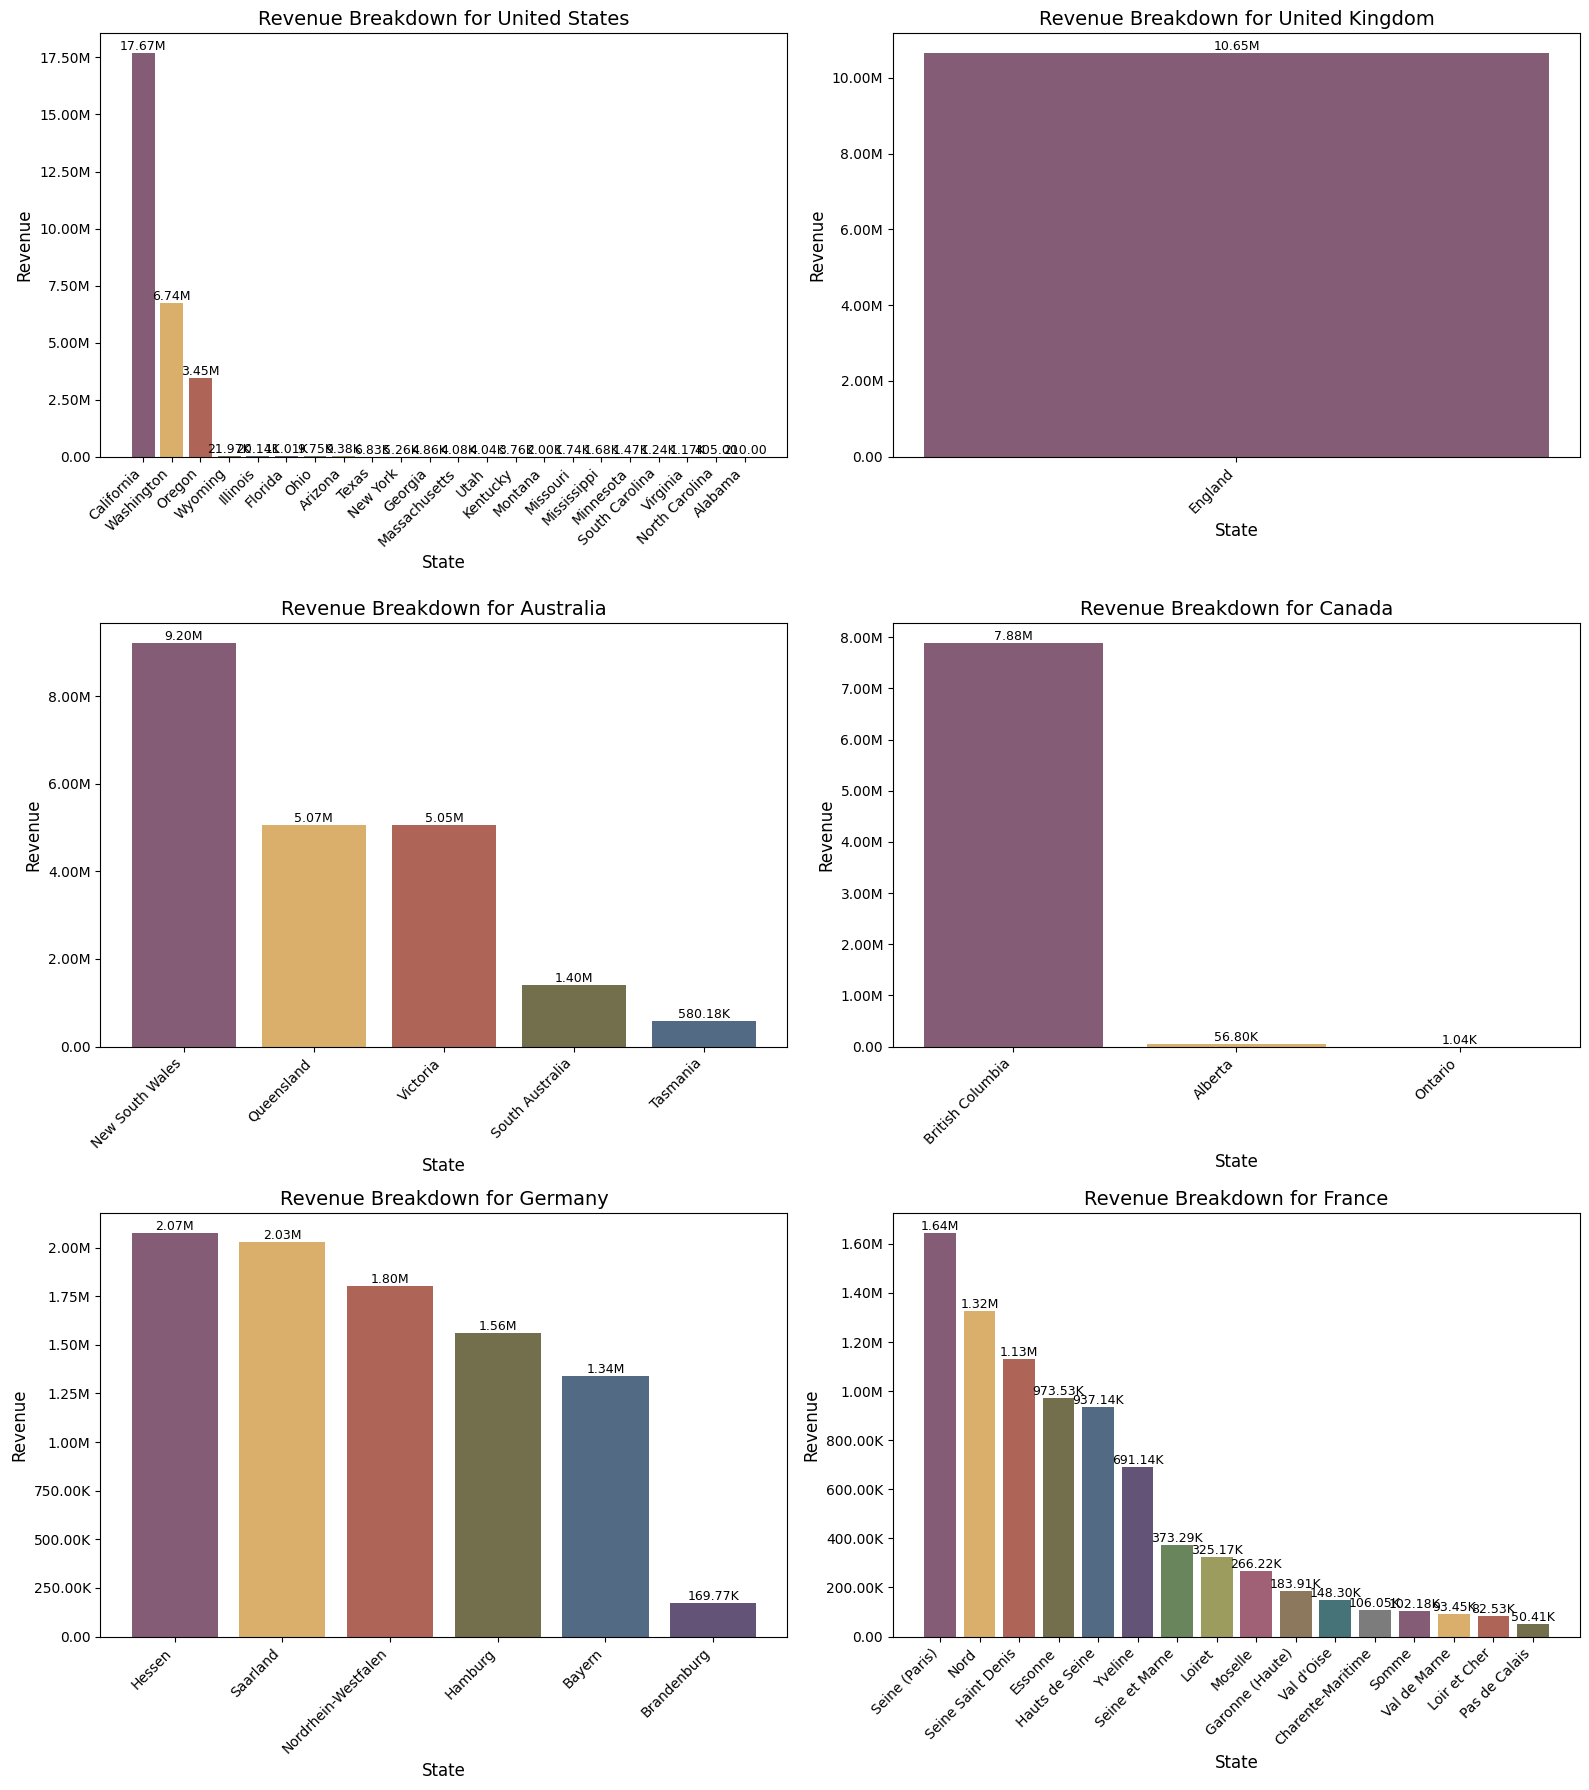

In [23]:
unique_countries = regional_sales['Country'].unique()
num_countries = len(unique_countries)
rows = (num_countries + 1) // 2  # Two plots per row

fig, axs = plt.subplots(rows, 2, figsize=(16, rows * 6))
axs = axs.flatten()  # Flatten to index individual subplots

for idx, country in enumerate(unique_countries):
    country_data = regional_sales[regional_sales['Country'] == country].sort_values(by='Revenue', ascending=False)

    # Assign distinct colors for states within this country
    state_colors = {state: cmap.colors[i % len(cmap.colors)] for i, state in enumerate(country_data['State'])}

    # Plotting revenue
    axs[idx].bar(
        country_data['State'], 
        country_data['Revenue'], 
        color=[state_colors[state] for state in country_data['State']]
    )

    # Adding annotations for revenue
    for i, value in enumerate(country_data['Revenue']):
        axs[idx].text(
            i, value, shorten_large_numbers(value), 
            ha='center', va='bottom', fontsize=9
        )

    # Setting titles and labels
    axs[idx].set_title(f'Revenue Breakdown for {country}', fontsize=14)
    axs[idx].set_xlabel('State', fontsize=12)
    axs[idx].set_ylabel('Revenue', fontsize=12)
    axs[idx].set_xticks(range(len(country_data['State'])))
    axs[idx].set_xticklabels(country_data['State'], rotation=45, ha='right')
    axs[idx].yaxis.set_major_formatter(FuncFormatter(shorten_large_numbers))

# Remove any empty subplots
for idx in range(len(unique_countries), len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()


#### **Analysis 2: Monthly and Yearly Sales Trends**

In [24]:
# Revenue trend by year and month
monthly_sales = df.groupby(['Year', 'Month']).agg({
    'Revenue': 'sum'
}).reset_index().sort_values(by=['Year', 'Month'])

monthly_sales

,Year,Month,Revenue
0,2011,April,698782
1,2011,August,880037
2,2011,December,1132666
3,2011,February,637598
4,2011,January,675193
...,...,...,...
57,2016,January,2553065
58,2016,July,499960
59,2016,June,3586300
60,2016,March,2608663


In [25]:
monthly_sales['Date'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'], format='%Y-%B')
monthly_sales = monthly_sales.sort_values(by='Date')
monthly_sales

,Year,Month,Revenue,Date
4,2011,January,675193,2011-01-01
3,2011,February,637598,2011-02-01
7,2011,March,708517,2011-03-01
0,2011,April,698782,2011-04-01
8,2011,May,734537,2011-05-01
...,...,...,...,...
60,2016,March,2608663,2016-03-01
55,2016,April,2756864,2016-04-01
61,2016,May,3264343,2016-05-01
59,2016,June,3586300,2016-06-01


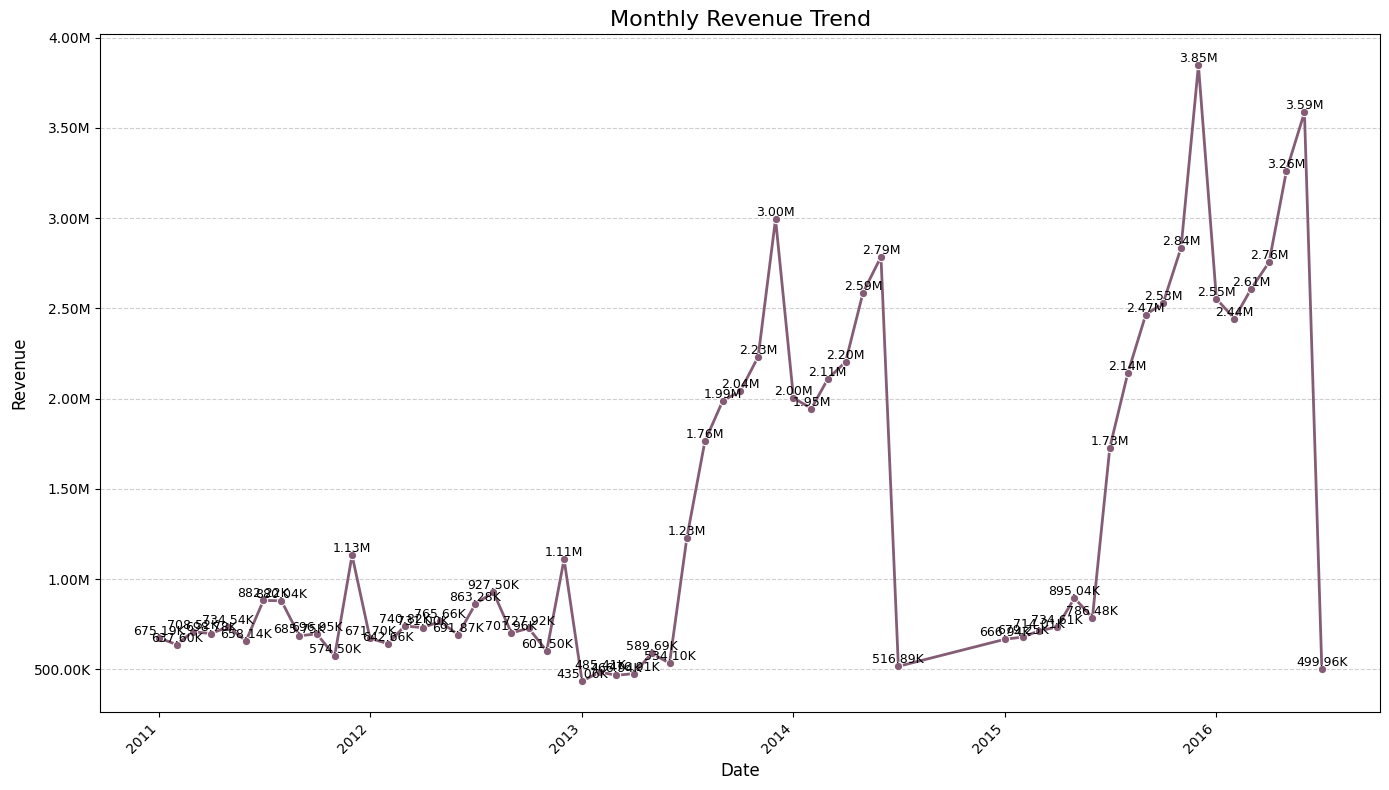

In [26]:
# Visualization
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_sales,
    x='Date',
    y='Revenue',
    marker='o',
    color=cmap.colors[0],  # Use a single color from the palette
    linewidth=2
)

# Add annotations for Revenue at each point
for x, y in zip(monthly_sales['Date'], monthly_sales['Revenue']):
    plt.text(x, y, shorten_large_numbers(y), ha='center', va='bottom', fontsize=9)

# Customize axes and titles
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(shorten_large_numbers))  # Apply formatter
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [28]:
# Yearly trend comparison
yearly_sales = df.groupby('Year')['Revenue'].sum().reset_index().sort_values(by='Year')

yearly_sales

,Year,Revenue
0,2011,8964888
1,2012,9175983
2,2013,15240037
3,2014,14152724
4,2015,20023991
5,2016,17713385


In [32]:
# Calculate percentage change
yearly_sales['Change (%)'] = yearly_sales['Revenue'].pct_change() * 100  # Convert to percentage
yearly_sales = yearly_sales.fillna(0)
yearly_sales

,Year,Revenue,Change (%)
0,2011,8964888,0.000000
1,2012,9175983,2.354686
2,2013,15240037,66.086151
3,2014,14152724,-7.134582
4,2015,20023991,41.485067
5,2016,17713385,-11.539188


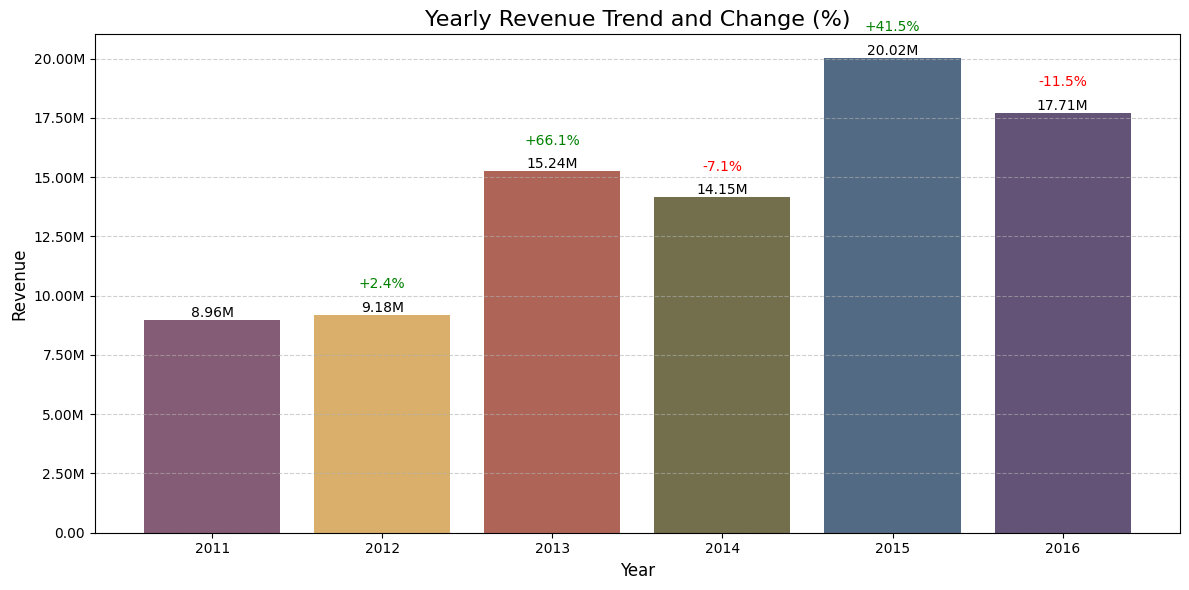

In [36]:
# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart for Revenue
bars = ax.bar(
    yearly_sales['Year'], 
    yearly_sales['Revenue'], 
    color=cmap.colors[:len(yearly_sales)]  # Use colors from the Antique palette
)

# Add revenue annotations
for bar, revenue in zip(bars, yearly_sales['Revenue']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        shorten_large_numbers(revenue),
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add percentage change annotations
for i in range(1, len(yearly_sales)):
    change = yearly_sales.loc[i, 'Change (%)']
    ax.text(
        yearly_sales.loc[i, 'Year'], 
        yearly_sales.loc[i, 'Revenue'] + (max(yearly_sales['Revenue']) * 0.05),  # Slightly above the bar
        f"{change:+.1f}%",  # Show + or - with 1 decimal point
        ha='center',
        va='bottom',
        fontsize=10,
        color='green' if change > 0 else 'red'  # Use green for positive and red for negative changes
    )

# Title and labels
ax.set_title('Yearly Revenue Trend and Change (%)', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Revenue', fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(shorten_large_numbers))  # Format y-axis with shorten_large_numbers
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#### **Analysis 3: Sales Growth Rate by Region**

In [16]:
# Calculate growth rate for each country/state
df['Year'] = pd.to_datetime(df['Date']).dt.year
growth_rate_region = df.groupby(['Country', 'State', 'Year']).agg({
    'Revenue': 'sum'
}).pct_change().reset_index().sort_values(by='Revenue', ascending=False)
growth_rate_region

,Country,State,Year,Revenue
250,United States,Washington,2011,1359.288732
188,United States,California,2011,266.435721
232,United States,Oregon,2011,150.482051
36,Canada,British Columbia,2011,100.276359
204,United States,Illinois,2013,66.647059
...,...,...,...,...
238,United States,South Carolina,2014,-0.999057
194,United States,Florida,2013,-0.999201
42,Canada,Ontario,2013,-0.999664
182,United States,Alabama,2013,-0.999981


In [47]:
# Extract year from date and group revenue by region and year
df['Year'] = pd.to_datetime(df['Date']).dt.year
revenue_by_region = df.groupby(['Country', 'State', 'Year']).agg({
    'Revenue': 'sum'
}).reset_index()

# Calculate the growth rate manually
revenue_by_region['Growth_Rate'] = (
    revenue_by_region.groupby(['Country', 'State'])['Revenue']
    .apply(lambda x: x.diff() / x.shift() * 100)
    .reset_index(drop=True)  # Ensure alignment with the original DataFrame
)

# Drop rows where growth rate is NaN (first year for each group)
growth_rate_region = revenue_by_region.dropna(subset=['Growth_Rate'])

# Sort by Growth Rate in descending order
growth_rate_region = growth_rate_region.sort_values(by='Growth_Rate', ascending=False)

growth_rate_region


,Country,State,Year,Revenue,Growth_Rate
260,United States,Wyoming,2015,2493,2639.560440
209,United States,Kentucky,2014,1773,1541.666667
211,United States,Kentucky,2016,1767,1536.111111
196,United States,Florida,2015,6593,725.156446
202,United States,Georgia,2015,481,501.250000
...,...,...,...,...,...
201,United States,Georgia,2014,80,-85.074627
197,United States,Florida,2016,698,-89.413014
210,United States,Kentucky,2015,108,-93.908629
259,United States,Wyoming,2014,91,-96.464646


#### **Predictive Analytics: Revenue Forecasting (XGBoost)**

In [ ]:
# Forecast future regional sales using XGBoost
X = df[['Country', 'State', 'Order_Quantity']]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


### **4. Profitability and Cost Efficiency Division**

This division dives into profit generation and cost efficiency across different business areas.

In [55]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Expected_Revenue,revenue_diff,Product_Color,Product_Size,Product_Name
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,45,120,590,360,950,960,10,unknown,unknown,Hitch Rack - 4-Bike
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,45,120,590,360,950,960,10,unknown,unknown,Hitch Rack - 4-Bike
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,45,120,1366,1035,2401,2760,359,unknown,unknown,Hitch Rack - 4-Bike
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,45,120,1188,900,2088,2400,312,unknown,unknown,Hitch Rack - 4-Bike
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,45,120,238,180,418,480,62,unknown,unknown,Hitch Rack - 4-Bike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,...,24,64,112,72,184,192,8,unknown,S,Classic Vest
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,...,24,64,655,528,1183,1408,225,unknown,M,Classic Vest
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,...,24,64,655,528,1183,1408,225,unknown,M,Classic Vest
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,...,24,64,684,576,1260,1536,276,unknown,L,Classic Vest


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int32         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

#### **Analysis 1: Correlaion in Financial**

In [58]:
# Correlation between revenue_diff, Order_Quantity, and Unit_Price
correlation = df[['Profit','Cost','Revenue','Expected_Revenue','revenue_diff']].corr()
correlation

,Profit,Cost,Revenue,Expected_Revenue,revenue_diff
Profit,1.000000,0.902233,0.956572,0.932886,0.555930
Cost,0.902233,1.000000,0.988758,0.993769,0.782671
Revenue,0.956572,0.988758,1.000000,0.995175,0.721788
Expected_Revenue,0.932886,0.993769,0.995175,1.000000,0.786216
revenue_diff,0.555930,0.782671,0.721788,0.786216,1.000000


#### **Analysis 1: Profit by Product Category and Sub-category**

In [62]:
# Profit breakdown by product category and sub-category
profitability_category = df.groupby(['Product_Category', 'Sub_Category']).agg({
    'Profit': 'sum'
}).reset_index().sort_values(by='Profit', ascending=False)
profitability_category

,Product_Category,Sub_Category,Profit
9,Bikes,Road Bikes,10078875
8,Bikes,Mountain Bikes,8160463
5,Accessories,Helmets,3380203
7,Accessories,Tires and Tubes,2727713
10,Bikes,Touring Bikes,2279938
14,Clothing,Shorts,1034342
2,Accessories,Bottles and Cages,810598
4,Accessories,Fenders,748914
13,Clothing,Jerseys,603568
6,Accessories,Hydration Packs,572668


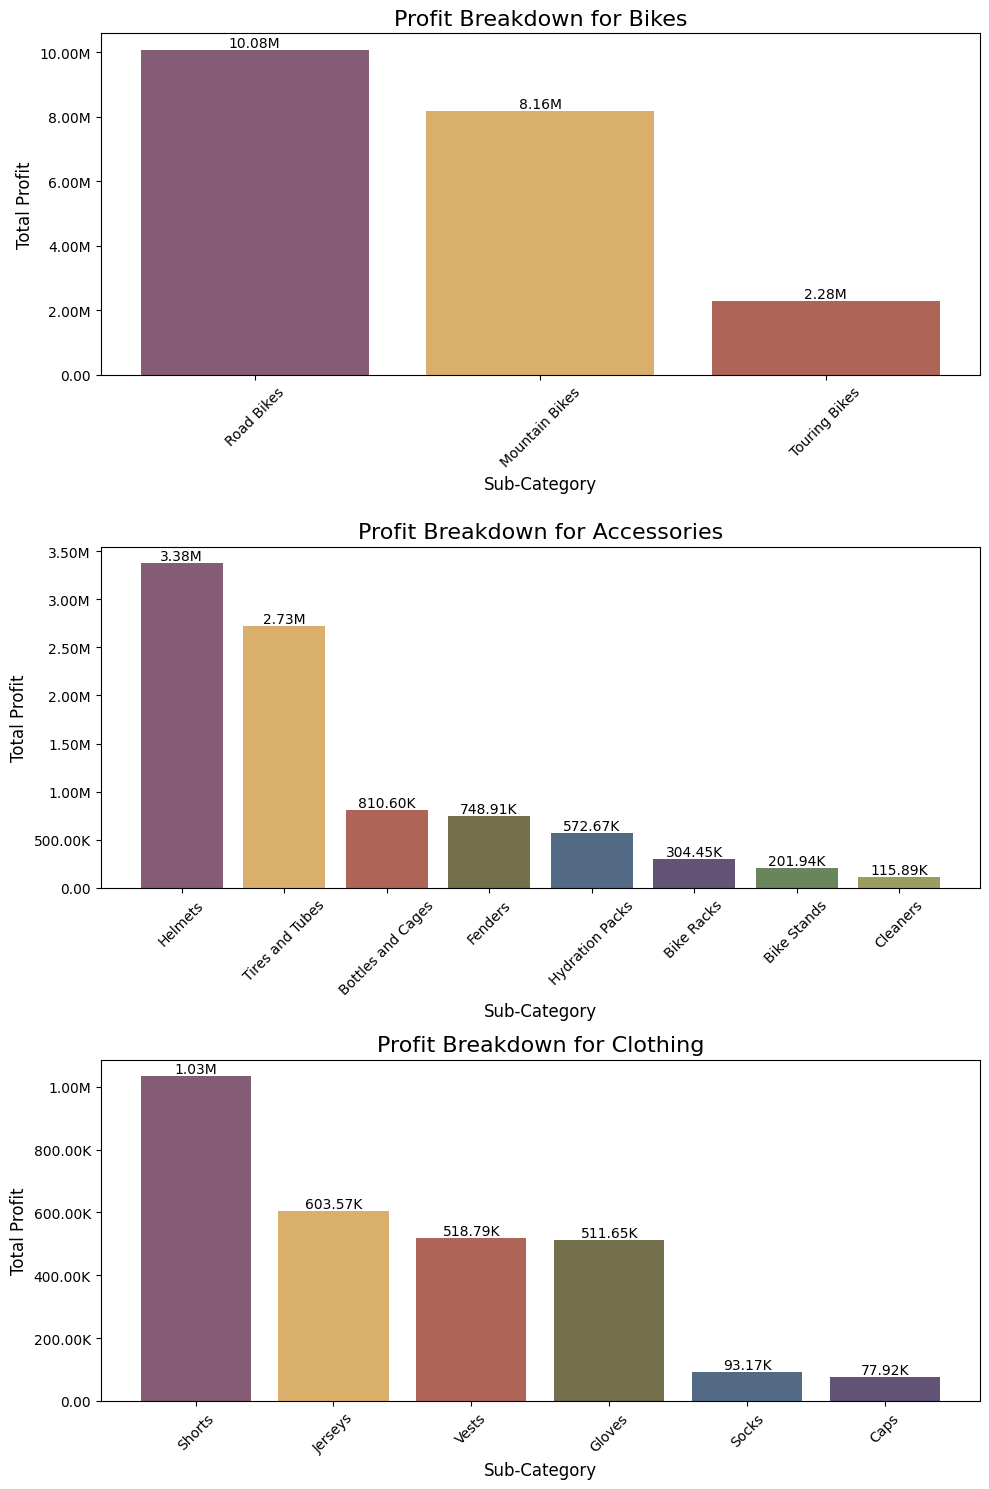

In [74]:
# Set up subplots: 3 rows, 1 column (one ax for each product category)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Get the unique Product Categories
categories = profitability_category['Product_Category'].unique()

# Loop through each product category and create its own bar chart
for i, category in enumerate(categories):
    category_data = profitability_category[profitability_category['Product_Category'] == category]
    
    # Create the bar chart for each product category
    axs[i].bar(category_data['Sub_Category'], category_data['Profit'], color=cmap.colors[:len(category_data)])
    
    # Set the title and labels
    axs[i].set_title(f'Profit Breakdown for {category}', fontsize=16)
    axs[i].set_xlabel('Sub-Category', fontsize=12)
    axs[i].set_ylabel('Total Profit', fontsize=12)
    axs[i].tick_params(axis='x', rotation=45)
    
    # Display the profit value on top of each bar
    for j, value in enumerate(category_data['Profit']):
        axs[i].text(j, value, shorten_large_numbers(value), ha='center', va='bottom', fontsize=10)
    
    # Format the y-axis to show large numbers as K/M
    axs[i].yaxis.set_major_formatter(FuncFormatter(shorten_large_numbers))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### **Analysis 2: Profit Margins by Product**

In [75]:
# Profit margin calculation
df['Profit_Margin'] = df['Profit'] / df['Revenue']
profit_margin_by_product = df.groupby('Product').agg({
    'Profit_Margin': 'mean'
}).reset_index().sort_values(by='Profit_Margin', ascending=False)
profit_margin_by_product

,Product,Profit_Margin
56,Road Tire Tube,0.722138
53,"Racing Socks, L",0.630829
54,"Racing Socks, M",0.629262
55,Road Bottle Cage,0.625271
21,ML Road Tire,0.597989
...,...,...
0,AWC Logo Cap,0.134941
98,"Short-Sleeve Classic Jersey, XL",0.127554
95,"Short-Sleeve Classic Jersey, L",0.125274
97,"Short-Sleeve Classic Jersey, S",0.124321


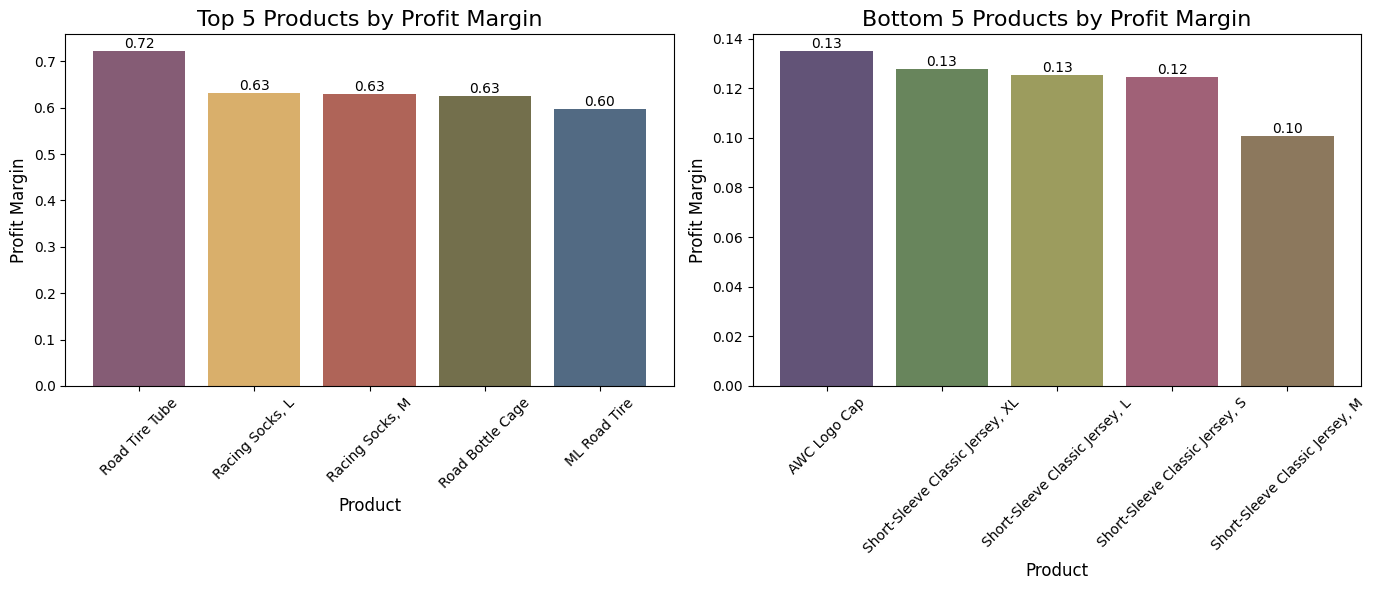

In [76]:
# Calculate the top 5 and bottom 5 Profit_Margin products
top_5_profit_margin = profit_margin_by_product.head(5)
bottom_5_profit_margin = profit_margin_by_product.tail(5)

# Create a subplot: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for Top 5 Profit Margin
axs[0].bar(top_5_profit_margin['Product'], top_5_profit_margin['Profit_Margin'], color=cmap.colors[:5])
axs[0].set_title('Top 5 Products by Profit Margin', fontsize=16)
axs[0].set_xlabel('Product', fontsize=12)
axs[0].set_ylabel('Profit Margin', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)

# Add value labels on top of each bar for the top 5
for i, value in enumerate(top_5_profit_margin['Profit_Margin']):
    axs[0].text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Bar chart for Bottom 5 Profit Margin
axs[1].bar(bottom_5_profit_margin['Product'], bottom_5_profit_margin['Profit_Margin'], color=cmap.colors[5:10])
axs[1].set_title('Bottom 5 Products by Profit Margin', fontsize=16)
axs[1].set_xlabel('Product', fontsize=12)
axs[1].set_ylabel('Profit Margin', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)

# Add value labels on top of each bar for the bottom 5
for i, value in enumerate(bottom_5_profit_margin['Profit_Margin']):
    axs[1].text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### **Analysis 3: Cost Efficiency by Region**

In [19]:
# Cost efficiency analysis by country and state
regional_cost_efficiency = df.groupby(['Country', 'State']).agg({
    'Cost': 'sum',
    'Revenue': 'sum'
}).reset_index()
regional_cost_efficiency['Cost_Efficiency'] = regional_cost_efficiency['Revenue'] / regional_cost_efficiency['Cost']
regional_cost_efficiency

,Country,State,Cost,Revenue,Cost_Efficiency
0,Australia,New South Wales,6069811,9203495,1.516274
1,Australia,Queensland,3447109,5066267,1.469715
2,Australia,South Australia,972435,1397274,1.436882
3,Australia,Tasmania,409861,580184,1.415563
4,Australia,Victoria,3626813,5054839,1.393741
5,Canada,Alberta,33453,56803,1.697994
6,Canada,British Columbia,4184542,7877890,1.882617
7,Canada,Ontario,447,1045,2.337808
8,France,Charente-Maritime,60047,106047,1.766067
9,France,Essonne,579684,973532,1.679418


#### **Analysis 4: Actual Revenue and Expected Revenue Distribution**

#### **Prescriptive Analytics: Operational and Strategic Recommendations**

### **5. Market Segmentation Division**

This division helps break down the market into meaningful segments for better product positioning and marketing strategies.

#### **Analysis 1: Market Segmentation by Age and Gender**

In [20]:
# Segmentation by age and gender
segment_sales = df.groupby(['Age_Group', 'Customer_Gender']).agg({
    'Revenue': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()
segment_sales

,Age_Group,Customer_Gender,Revenue,Order_Quantity
0,Adults (35-64),F,21269149,328479
1,Adults (35-64),M,21315004,343938
2,Seniors (64+),F,130050,4506
3,Seniors (64+),M,177992,5371
4,Young Adults (25-34),F,15194242,214441
5,Young Adults (25-34),M,15461372,232434
6,Youth (<25),F,5342158,98307
7,Youth (<25),M,6381041,117840


#### **Analysis 2: BCG Matrix for Product Categories**

In [21]:
# BCG matrix analysis for product categories
total_revenue = df['Revenue'].sum()
category_performance = df.groupby('Product_Category').agg({
    'Revenue': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

# Market share calculation
category_performance['Market_Share'] = category_performance['Revenue'] / total_revenue
category_performance

,Product_Category,Revenue,Order_Quantity,Market_Share
0,Accessories,15117992,1054162,0.177293
1,Bikes,61782134,36411,0.724539
2,Clothing,8370882,254743,0.098168


In [ ]:
# Calculate Total Revenue per Product Category/Sub-Category
## Group by Product Category or Sub-Category and calculate total revenue
category_revenue = df.groupby('Product_Category')['Revenue'].sum().reset_index()
category_revenue.columns = ['Product_Category', 'Total_Revenue']

# Calculate Market Share
## Calculate total market revenue
total_market_revenue = category_revenue['Total_Revenue'].sum()

## Calculate market share for each category
category_revenue['Market_Share'] = (category_revenue['Total_Revenue'] / total_market_revenue) * 100

# Calculate Market Growth Rate
## Group by Product Category and Year to calculate annual revenue
yearly_revenue = df.groupby(['Year', 'Product_Category'])['Revenue'].sum().reset_index()

## Calculate year-over-year growth for each category
yearly_revenue['Revenue_Growth'] = yearly_revenue.groupby('Product_Category')['Revenue'].pct_change() * 100

# Calculate Relative Market Share
## Find the category with the largest market share
max_market_share = category_revenue['Market_Share'].max()

## Calculate relative market share for each category
category_revenue['Relative_Market_Share'] = category_revenue['Market_Share'] / max_market_share

# Classify Products into BCG Matrix Categories
# Stars: High growth, high market share (market share > 1 and growth rate > market average)
# Cash Cows: Low growth, high market share (market share > 1 and growth rate < market average)
# Question Marks: High growth, low market share (market share < 1 and growth rate > market average)
# Dogs: Low growth, low market share (market share < 1 and growth rate < market average)
## Define average market growth rate for classification
average_growth_rate = yearly_revenue['Revenue_Growth'].mean()

## Classify each category
category_revenue['BCG_Category'] = category_revenue.apply(
    lambda row: 'Star' if row['Relative_Market_Share'] > 1 and row['Revenue_Growth'] > average_growth_rate else
                'Cash Cow' if row['Relative_Market_Share'] > 1 and row['Revenue_Growth'] <= average_growth_rate else
                'Question Mark' if row['Relative_Market_Share'] < 1 and row['Revenue_Growth'] > average_growth_rate else
                'Dog',
    axis=1
)

import matplotlib.pyplot as plt

# Visualize the BCG Matrix
## Plot BCG matrix
plt.figure(figsize=(10, 6))
for category in category_revenue['BCG_Category'].unique():
    subset = category_revenue[category_revenue['BCG_Category'] == category]
    plt.scatter(subset['Relative_Market_Share'], subset['Revenue_Growth'], label=category, s=subset['Total_Revenue'] * 0.01)

plt.title('BCG Matrix')
plt.xlabel('Relative Market Share')
plt.ylabel('Revenue Growth (%)')
plt.legend()
plt.show()


#### **Analysis 3: Product Category Market Share and Growth**

In [22]:
# Growth rate calculation year-over-year for product categories
category_growth = df.groupby(['Product_Category', 'Year']).agg({
    'Revenue': 'sum'
}).pct_change().reset_index().sort_values(by='Revenue', ascending=False)
category_growth

,Product_Category,Year,Revenue
4,Bikes,2011,1.158014
8,Bikes,2015,0.944371
1,Accessories,2014,0.268711
3,Accessories,2016,0.264239
13,Clothing,2016,0.127930
11,Clothing,2014,0.125613
6,Bikes,2013,0.074412
5,Bikes,2012,0.023547
12,Clothing,2015,-0.137433
7,Bikes,2014,-0.227974


## DRAFT

### 1. **Product Division** (Analyzing Product Performance)

This division focuses on understanding the performance of various products and product categories to guide inventory, marketing, and development strategies.

#### **Analysis 1: Top-selling Products by Revenue and Profit**
- Insight: Identify top-performing products to focus on.
   ```python
   top_products_revenue = product_performance.sort_values(by='Revenue', ascending=False).head(10)
   top_products_profit = product_performance.sort_values(by='Profit', ascending=False).head(10)
   ```

#### **Analysis 2: Product Category and Sub-category Performance**
- Insight: Understand the contributions of different product categories and sub-categories to revenue and profit.
   ```python
   category_performance = df.groupby(['Product_Category', 'Sub_Category']).agg({
       'Revenue': 'sum', 'Profit': 'sum', 'Order_Quantity': 'sum'
   }).reset_index().sort_values(by='Revenue', ascending=False)
   ```

#### **Analysis 3: Low-performing Products**
- Insight: Identify underperforming products to either improve or discontinue.
   ```python
   low_products_revenue = product_performance.sort_values(by='Revenue').head(10)
   low_profit_margin = product_performance.sort_values(by='Profit_Margin').head(10)
   ```

#### **Predictive Analytics: Forecast Product Demand (XGBoost)**
- Insight: Use XGBoost to forecast demand for specific product categories.
   ```python
   # Forecast demand for Accessories, Bikes, and Clothing using XGBoost
   ```

### 2. **Customer Division** (Understanding Customer Demographics and Behavior)

This division focuses on customer analysis, including demographics, purchase behavior, and customer lifetime value.

#### **Analysis 1: Customer Age Group and Revenue**
- Insight: Understand which age groups are driving sales.
   ```python
   age_group_revenue = df.groupby('Age_Group').agg({
       'Revenue': 'sum', 'Order_Quantity': 'sum'
   }).reset_index().sort_values(by='Revenue', ascending=False)
   ```

#### **Analysis 2: Gender-based Buying Behavior**
- Insight: Compare male and female customers' buying behavior.
   ```python
   gender_sales = df.groupby('Customer_Gender').agg({
       'Revenue': 'sum', 'Order_Quantity': 'sum'
   }).reset_index()
   ```

#### **Analysis 3: Customer Lifetime Value (CLV)**
- Insight: Identify the most valuable customers.
   ```python
   clv = df.groupby('Customer_ID').agg({
       'Revenue': 'sum', 'Order_Quantity': 'sum'
   }).reset_index().sort_values(by='Revenue', ascending=False)
   ```

#### **Predictive Analytics: Forecast Customer Demand (XGBoost)**
- Insight: Use XGBoost to forecast customer purchasing behavior and demand.
   ```python
   # Forecast customer demand based on historical behavior
   ```


### 3. **Sales and Regional Performance Division**

This division explores sales trends and performance across regions and time to drive location-based strategies.

#### **Analysis 1: Revenue by Region (Country, State)**
- Insight: Identify top-performing regions to allocate resources effectively.
   ```python
   regional_sales = df.groupby(['Country', 'State']).agg({
       'Revenue': 'sum', 'Order_Quantity': 'sum'
   }).reset_index().sort_values(by='Revenue', ascending=False)
   ```

#### **Analysis 2: Monthly and Yearly Sales Trends**
- Insight: Analyze sales patterns over time to spot trends and predict seasonality.
   ```python
   monthly_sales = df.groupby(['Year', 'Month']).agg({
       'Revenue': 'sum'
   }).reset_index().sort_values(by=['Year', 'Month'])
   ```

#### **Analysis 3: Sales Growth Rate by Region**
- Insight: Calculate and monitor growth rate by region to identify expansion opportunities.
   ```python
   growth_rate_region = df.groupby(['Country', 'State', 'Year']).agg({
       'Revenue': 'sum'
   }).pct_change().reset_index().sort_values(by='Revenue', ascending=False)
   ```

#### **Predictive Analytics: Revenue Forecasting (XGBoost)**
- Insight: Use XGBoost to forecast future revenue by region.
   ```python
   # Predict future regional sales using XGBoost
   ```


### 4. **Profitability and Cost Efficiency Division**

This division dives into profit generation and cost efficiency across different business areas.

#### **Analysis 1: Profit by Product Category and Sub-category**
- Insight: Identify which product categories generate the highest profit.
   ```python
   profitability_category = df.groupby(['Product_Category', 'Sub_Category']).agg({
       'Profit': 'sum'
   }).reset_index().sort_values(by='Profit', ascending=False)
   ```

#### **Analysis 2: Profit Margins by Product**
- Insight: Calculate the profit margin for each product to determine efficiency.
   ```python
   profit_margin_by_product = df.groupby('Product').agg({
       'Profit_Margin': 'mean'
   }).reset_index().sort_values(by='Profit_Margin', ascending=False)
   ```

#### **Analysis 3: Cost Efficiency by Region**
- Insight: Analyze how cost-efficient different regions are in terms of revenue generated vs. cost.
   ```python
   regional_cost_efficiency = df.groupby(['Country', 'State']).agg({
       'Cost': 'sum', 'Revenue': 'sum'
   }).reset_index()
   regional_cost_efficiency['Cost_Efficiency'] = regional_cost_efficiency['Revenue'] / regional_cost_efficiency['Cost']
   ```

#### **Prescriptive Analytics: Operational and Strategic Recommendations**
- Insight: Use profitability and forecast insights to recommend actions on staffing, marketing, and product management.
   ```python
   # Recommend resource allocation based on profitability and growth forecasts
   ```

### 5. **Market Segmentation Division**

This division helps break down the market into meaningful segments for better product positioning and marketing strategies.

#### **Analysis 1: Market Segmentation by Age and Gender**
- Insight: Segment customers by demographic groups to understand how different segments contribute to overall sales.
   ```python
   segment_sales = df.groupby(['Age_Group', 'Customer_Gender']).agg({
       'Revenue': 'sum', 'Order_Quantity': 'sum'
   }).reset_index()
   ```

#### **Analysis 2: BCG Matrix for Product Categories**
- Insight: Classify product categories into **Stars**, **Cash Cows**, **Dogs**, and **Question Marks** to guide strategic focus.
   ```python
   # BCG matrix for product categories based on revenue and growth rate
   ```

#### **Analysis 3: Product Category Market Share and Growth**
- Insight: Calculate market share and growth rate for each product category.
   ```python
   category_growth = df.groupby(['Product_Category', 'Year']).agg({
       'Revenue': 'sum'
   }).pct_change().reset_index().sort_values(by='Revenue', ascending=False)
   ```
